# 1 Preparation

## 1.1 Libraries

In [161]:
import pandas as pd
import numpy as np

# Plottings
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Test 
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

## 1.2 General Functions

In [162]:
# print in yellow and bold
def print_yellow_and_bold(text):
    bold_text = "\033[93;1m" + text + "\033[0m"
    print(bold_text)

## 1.3 Import Dataset

In [163]:
data = "/Users/toan/Arbeit/Ironhack/Miniproject/final_project/data/raw/Heart Attack Dataset/Medicaldataset.csv"

In [164]:
df = pd.read_csv(data)
display(df.head(20))

Age  Gender  Heart rate  Systolic blood pressure  \
0    64       1          66                      160   
1    21       1          94                       98   
2    55       1          64                      160   
3    64       1          70                      120   
4    55       1          64                      112   
5    58       0          61                      112   
6    32       0          40                      179   
7    63       1          60                      214   
8    44       0          60                      154   
9    67       1          61                      160   
10   44       0          60                      166   
11   63       0          60                      150   
12   64       1          60                      199   
13   54       0          94                      122   
14   47       1          76                      120   
15   61       1          81                      118   
16   86       0          73                      114   
17   45       0          70                      100   
18   37       0          72                      107   
19   45       1          60                      109   

    Diastolic blood pressure  Blood sugar    CK-MB  Troponin    Result  
0                         83        160.0    1.800     0.012  negative  
1                         46        296.0    6.750     1.060  positive  
2                         77        270.0    1.990     0.003  negative  
3                         55        270.0   13.870     0.122  positive  
4                         65        300.0    1.080     0.003  negative  
5                         58         87.0    1.830     0.004  negative  
6                         68        102.0    0.710     0.003  negative  
7                         82         87.0  300.000     2.370  positive  
8                         81        135.0    2.350     0.004  negative  
9                         95        100.0    2.840     0.011  negative  
10                        90        102.0    2.390     0.006  negative  
11                        83        198.0    2.390     0.013  negative  
12                        99         92.0    3.430     5.370  positive  
13                        67         97.0    1.420     0.012  negative  
14                        70        319.0    2.570     0.003  negative  
15                        66        134.0    1.490     0.017  positive  
16                        68         87.0    1.110     0.776  positive  
17                        68         96.0    0.606     0.004  negative  
18                        86        274.0    2.890     0.003  negative  
19                        65         89.0    1.600     0.020  positive

# 2 Data Information

## 2.1 Functions

In [165]:
# Main function to display all relevant Informations
def Dataset_Information(df):
    
    def print_yellow_and_bold(text):
        print("\033[1m\033[93m" + text + "\033[0m")
    
    # Display the entire DataFrame
    display(df)
    
    # Display column names in yellow
    print_yellow_and_bold("Column names:")
    display(df.columns)

    # Display shape of the DataFrame in yellow
    print_yellow_and_bold("\nShape of the DataFrame:")
    display(df.shape)

    # Display info of the DataFrame in yellow
    print_yellow_and_bold("\nDescribe DataFrame:")
    display(df.describe())
    
    # Display info of the DataFrame in yellow
    print_yellow_and_bold("\nInfo of the DataFrame:")
    display(df.info())
    
    # Display data types of each column in yellow
    print_yellow_and_bold("\nData types of each column:")
    display(df.dtypes)

    # Check for null values in each column in yellow
    print_yellow_and_bold("\nCheck for null values in each column:")
    display(df.isna().any())

    # Checking for Null Values (Returns a DataFrame with True where values are null) in yellow
    print_yellow_and_bold("\nDataFrame with True where values are null:")
    display(df.isnull())

    # Count the number of null values in each column in yellow
    print_yellow_and_bold("\nCount of null values in each column:")
    display(df.isna().sum())
    
    # Display unique values count for each column in yellow
    print_yellow_and_bold("\nCount of unique values in each column:")
    display(df.nunique())
    
    # Display all unique values for each column in yellow
    print_yellow_and_bold("\nUnique values for each column:")
    unique_values_dict = {column: df[column].unique() for column in df.columns}
    for column, unique_values in unique_values_dict.items():
        print_yellow_and_bold(f"\nUnique values in column '{column}':")
        display(unique_values)


## 2.2 Display Informations

In [166]:
# Get informations about df
Dataset_Information(df)

Age  Gender  Heart rate  Systolic blood pressure  \
0      64       1          66                      160   
1      21       1          94                       98   
2      55       1          64                      160   
3      64       1          70                      120   
4      55       1          64                      112   
...   ...     ...         ...                      ...   
1314   44       1          94                      122   
1315   66       1          84                      125   
1316   45       1          85                      168   
1317   54       1          58                      117   
1318   51       1          94                      157   

      Diastolic blood pressure  Blood sugar  CK-MB  Troponin    Result  
0                           83        160.0   1.80     0.012  negative  
1                           46        296.0   6.75     1.060  positive  
2                           77        270.0   1.99     0.003  negative  
3                           55        270.0  13.87     0.122  positive  
4                           65        300.0   1.08     0.003  negative  
...                        ...          ...    ...       ...       ...  
1314                        67        204.0   1.63     0.006  negative  
1315                        55        149.0   1.33     0.172  positive  
1316                       104         96.0   1.24     4.250  positive  
1317                        68        443.0   5.80     0.359  positive  
1318                        79        134.0  50.89     1.770  positive  

[1319 rows x 9 columns]

Column names:


Index(['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin',
       'Result'],
      dtype='object')


Shape of the DataFrame:


(1319, 9)


Describe DataFrame:


Age       Gender   Heart rate  Systolic blood pressure  \
count  1319.000000  1319.000000  1319.000000              1319.000000   
mean     56.191812     0.659591    78.336619               127.170584   
std      13.647315     0.474027    51.630270                26.122720   
min      14.000000     0.000000    20.000000                42.000000   
25%      47.000000     0.000000    64.000000               110.000000   
50%      58.000000     1.000000    74.000000               124.000000   
75%      65.000000     1.000000    85.000000               143.000000   
max     103.000000     1.000000  1111.000000               223.000000   

       Diastolic blood pressure  Blood sugar        CK-MB     Troponin  
count               1319.000000  1319.000000  1319.000000  1319.000000  
mean                  72.269143   146.634344    15.274306     0.360942  
std                   14.033924    74.923045    46.327083     1.154568  
min                   38.000000    35.000000     0.321000     0.001000  
25%                   62.000000    98.000000     1.655000     0.006000  
50%                   72.000000   116.000000     2.850000     0.014000  
75%                   81.000000   169.500000     5.805000     0.085500  
max                  154.000000   541.000000   300.000000    10.300000


Info of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


None


Data types of each column:


Age                           int64
Gender                        int64
Heart rate                    int64
Systolic blood pressure       int64
Diastolic blood pressure      int64
Blood sugar                 float64
CK-MB                       float64
Troponin                    float64
Result                       object
dtype: object


Check for null values in each column:


Age                         False
Gender                      False
Heart rate                  False
Systolic blood pressure     False
Diastolic blood pressure    False
Blood sugar                 False
CK-MB                       False
Troponin                    False
Result                      False
dtype: bool


DataFrame with True where values are null:


Age  Gender  Heart rate  Systolic blood pressure  \
0     False   False       False                    False   
1     False   False       False                    False   
2     False   False       False                    False   
3     False   False       False                    False   
4     False   False       False                    False   
...     ...     ...         ...                      ...   
1314  False   False       False                    False   
1315  False   False       False                    False   
1316  False   False       False                    False   
1317  False   False       False                    False   
1318  False   False       False                    False   

      Diastolic blood pressure  Blood sugar  CK-MB  Troponin  Result  
0                        False        False  False     False   False  
1                        False        False  False     False   False  
2                        False        False  False     False   False  
3                        False        False  False     False   False  
4                        False        False  False     False   False  
...                        ...          ...    ...       ...     ...  
1314                     False        False  False     False   False  
1315                     False        False  False     False   False  
1316                     False        False  False     False   False  
1317                     False        False  False     False   False  
1318                     False        False  False     False   False  

[1319 rows x 9 columns]


Count of null values in each column:


Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64


Count of unique values in each column:


Age                          75
Gender                        2
Heart rate                   79
Systolic blood pressure     116
Diastolic blood pressure     73
Blood sugar                 244
CK-MB                       700
Troponin                    352
Result                        2
dtype: int64


Unique values for each column:

Unique values in column 'Age':


array([ 64,  21,  55,  58,  32,  63,  44,  67,  54,  47,  61,  86,  45,
        37,  60,  48,  52,  30,  50,  72,  42,  35,  68,  56,  65,  34,
        40,  46,  38,  57,  28,  49,  29,  80,  90,  62,  53,  75,  66,
        19,  77,  71,  43,  51,  59,  20,  36,  70,  78,  69,  73,  41,
        82,  25,  26,  76,  33,  39,  91,  31,  74,  22,  79,  81,  27,
        83,  24,  85,  88, 100,  23,  14,  87, 103,  84])


Unique values in column 'Gender':


array([1, 0])


Unique values in column 'Heart rate':


array([  66,   94,   64,   70,   61,   40,   60,   76,   81,   73,   72,
         92,  135,   63,   65,  125,   62,   58,   93,   96,   95,   97,
         91,   87,   77,   80,   82,   83,   78,   90,   59,   57,   98,
       1111,  102,  103,  105,   74,   85,   75,   71,   68,   67,   56,
         89,   88,   86,   79,  100,   69,   84,  110,  120,  122,  119,
        116,  114,   55,   53,   54,  117,  112,  108,  134,  111,  101,
        113,   51,   52,   99,  132,   50,  107,  104,   49,   46,   20,
         36,   45])


Unique values in column 'Systolic blood pressure':


array([160,  98, 120, 112, 179, 214, 154, 166, 150, 199, 122, 118, 114,
       100, 107, 109, 151, 110, 104, 106, 152, 134, 135, 131, 137, 121,
       145, 136, 156, 155, 105,  91, 101, 111, 115, 133, 153, 125, 130,
       127, 140, 141, 128, 123,  94,  95, 117, 124, 119, 138, 157, 202,
       175, 144, 129,  97, 116, 113, 148, 164, 192, 171, 108, 132,  85,
        89,  87,  99,  96,  86,  70,  71,  78, 126, 170, 169, 149, 168,
       191, 193, 167, 165, 146,  93, 180,  42, 220, 147, 142, 102, 103,
       143, 139, 178,  80,  84,  83,  65, 208,  76,  90,  92, 183,  88,
       158, 161, 176, 159, 198, 204, 200, 162, 177, 223,  67, 209])


Unique values in column 'Diastolic blood pressure':


array([ 83,  46,  77,  55,  65,  58,  68,  82,  81,  95,  90,  99,  67,
        70,  66,  86,  78,  60,  85,  63,  57,  61,  49,  62,  76,  75,
        71,  52,  80,  74,  73,  69,  94,  88,  64,  59,  93,  54,  56,
        44,  72,  89,  51,  50,  79,  47,  92, 103,  97, 110,  84, 104,
       100,  42, 128, 107,  91,  98,  38,  53,  48,  87, 106,  41,  40,
       105, 102, 118, 109,  43,  45,  96, 154])


Unique values in column 'Blood sugar':


array([160. , 296. , 270. , 300. ,  87. , 102. , 135. , 100. , 198. ,
        92. ,  97. , 319. , 134. ,  96. , 274. ,  89. , 301. , 227. ,
       107. , 269. , 111. , 101. ,  95. , 279. , 166. , 321. ,  98. ,
       105. , 136. ,  82. , 117. , 120. , 208. , 125. , 103. ,  93. ,
        99. , 228. , 238. , 133. , 113. ,  91. , 114. , 149. , 110. ,
       251. , 191. , 334. , 109. , 201. , 167. ,  85. , 112. , 123. ,
        86. , 177. ,  90. , 115. , 392. , 147. , 141. , 222. , 174. ,
       162. , 219. , 189. , 193. , 181. , 387. , 121. , 294. , 116. ,
        88. , 240. , 132. , 159. ,  81. , 266. , 142. , 244. , 130. ,
       182. ,  94. ,  83. , 241. , 318. ,  66. , 156. , 108. , 322. ,
       187. , 122. , 362. , 180. , 127. , 131. ,  84. , 137. , 242. ,
       106. , 197. , 152. , 169. , 347. , 104. , 165. , 126. , 215. ,
        61. ,  80. , 195. , 150. , 194. , 233. , 462. , 422. , 245. ,
       168. , 188. , 129. , 200. , 146. , 140. , 382. , 217. , 303. ,
       154. , 221. ,


Unique values in column 'CK-MB':


array([  1.8  ,   6.75 ,   1.99 ,  13.87 ,   1.08 ,   1.83 ,   0.71 ,
       300.   ,   2.35 ,   2.84 ,   2.39 ,   3.43 ,   1.42 ,   2.57 ,
         1.49 ,   1.11 ,   0.606,   2.89 ,   1.6  ,  94.79 ,   0.665,
        50.46 ,  38.72 ,   2.11 ,   2.93 ,   1.61 ,   0.493,   1.31 ,
         4.58 ,   6.48 ,   0.929,   1.37 ,   6.78 ,   4.24 ,   1.3  ,
         0.609,  15.23 ,   1.54 ,  16.95 ,   2.97 ,   4.22 ,   1.29 ,
         4.8  ,   1.33 ,   1.19 ,   0.78 ,   2.28 ,   4.39 ,  19.47 ,
         2.41 ,   3.18 ,  36.24 ,   2.21 ,   2.19 ,   5.33 ,   5.22 ,
         1.63 ,   1.24 ,   5.8  ,   3.29 ,   0.937,   4.45 ,   4.02 ,
        18.15 ,   0.865,   3.3  ,   0.718,   3.45 ,   7.65 ,   4.3  ,
         0.994,   1.53 ,  31.97 ,   2.91 ,   3.2  ,   9.35 ,  12.02 ,
         4.66 ,   4.18 ,   5.81 ,   0.633,   2.69 ,   1.06 ,   4.82 ,
         2.13 ,   2.85 ,   6.91 ,   1.98 ,  19.5  ,   0.468, 165.1  ,
         1.64 ,   1.87 ,   1.69 ,   3.27 ,   3.75 ,   1.51 ,   2.16 ,
         5.27 ,   1.


Unique values in column 'Troponin':


array([1.20e-02, 1.06e+00, 3.00e-03, 1.22e-01, 4.00e-03, 2.37e+00,
       1.10e-02, 6.00e-03, 1.30e-02, 5.37e+00, 1.70e-02, 7.76e-01,
       2.00e-02, 5.00e-03, 4.91e-01, 6.12e-01, 1.39e+00, 7.00e-03,
       1.00e+01, 8.30e+00, 2.10e-02, 1.15e+00, 1.46e-01, 8.00e-03,
       2.60e-02, 5.30e-02, 9.00e-03, 6.70e-02, 4.00e-02, 1.00e-02,
       3.10e-02, 1.50e-02, 7.60e-02, 5.20e-02, 1.01e+00, 8.90e-02,
       2.80e-02, 7.03e-01, 8.50e-02, 2.19e-01, 8.64e-01, 1.05e-01,
       4.80e-02, 8.88e-01, 1.60e-02, 1.07e+00, 2.20e-02, 6.05e+00,
       7.10e-02, 1.03e-01, 2.30e-02, 3.80e-02, 5.10e-02, 2.90e-02,
       1.40e-02, 2.23e+00, 1.55e+00, 1.84e+00, 6.40e-01, 7.67e+00,
       6.10e-02, 9.40e-02, 2.70e-02, 5.40e-02, 2.52e-01, 1.79e+00,
       1.95e+00, 3.92e-01, 3.27e-01, 4.60e-02, 1.24e+00, 1.78e-01,
       1.90e-02, 1.97e+00, 6.81e-01, 1.06e-01, 1.46e+00, 6.30e-02,
       1.23e+00, 2.86e+00, 1.64e-01, 1.86e+00, 3.20e-02, 2.40e-02,
       2.50e-02, 1.42e-01, 2.99e+00, 1.00e-03, 1.71e-01, 2.80e


Unique values in column 'Result':


array(['negative', 'positive'], dtype=object)

# 3 Data Cleaning

# 3.1 Make copy of DataFrame

In [167]:
df_cleaned = df.copy()

# 3.2 Cleaning

**Rename Column Titles**

In [168]:
df_cleaned.columns = df_cleaned.columns.str.replace(" ", "_")

**Make Values unit to floats CK-MB**

In [169]:
df_cleaned['CK-MB'] = df['CK-MB'].astype(float).round(2)

**Make Values unit to floats Troponin**

In [170]:
df_cleaned['Troponin'] = df['Troponin'].astype(float).round(3)

**Make Values unit to integer Blood sugar**

In [171]:
df_cleaned['Blood_sugar'] = df_cleaned['Blood_sugar'].astype(int)

**Drop Duplicates**

In [172]:
# To identify duplicate rows in a DataFrame, we can use the duplicated() method, 
# which returns a boolean Series indicating whether each row is a duplicate or not. 
# We can then use the sum() method to count the total number of duplicates.
display(df_cleaned.duplicated().sum())
display(df.duplicated().any())

np.int64(0)

np.False_

In [173]:
# Remove duplicates and update the DataFrame
df_cleaned.drop_duplicates(inplace=True)

## Export Cleaned Dataset

In [174]:
df_cleaned.to_csv('/Users/toan/Arbeit/Ironhack/Miniproject/final_project/data/cleaned/Medicaldataset_cleaned.csv', index=False)  

## 3.4 Display Informations to cleaned DataFrame

In [175]:
Dataset_Information(df_cleaned)

Age  Gender  Heart_rate  Systolic_blood_pressure  \
0      64       1          66                      160   
1      21       1          94                       98   
2      55       1          64                      160   
3      64       1          70                      120   
4      55       1          64                      112   
...   ...     ...         ...                      ...   
1314   44       1          94                      122   
1315   66       1          84                      125   
1316   45       1          85                      168   
1317   54       1          58                      117   
1318   51       1          94                      157   

      Diastolic_blood_pressure  Blood_sugar  CK-MB  Troponin    Result  
0                           83          160   1.80     0.012  negative  
1                           46          296   6.75     1.060  positive  
2                           77          270   1.99     0.003  negative  
3                           55          270  13.87     0.122  positive  
4                           65          300   1.08     0.003  negative  
...                        ...          ...    ...       ...       ...  
1314                        67          204   1.63     0.006  negative  
1315                        55          149   1.33     0.172  positive  
1316                       104           96   1.24     4.250  positive  
1317                        68          443   5.80     0.359  positive  
1318                        79          134  50.89     1.770  positive  

[1319 rows x 9 columns]

Column names:


Index(['Age', 'Gender', 'Heart_rate', 'Systolic_blood_pressure',
       'Diastolic_blood_pressure', 'Blood_sugar', 'CK-MB', 'Troponin',
       'Result'],
      dtype='object')


Shape of the DataFrame:


(1319, 9)


Describe DataFrame:


Age       Gender   Heart_rate  Systolic_blood_pressure  \
count  1319.000000  1319.000000  1319.000000              1319.000000   
mean     56.191812     0.659591    78.336619               127.170584   
std      13.647315     0.474027    51.630270                26.122720   
min      14.000000     0.000000    20.000000                42.000000   
25%      47.000000     0.000000    64.000000               110.000000   
50%      58.000000     1.000000    74.000000               124.000000   
75%      65.000000     1.000000    85.000000               143.000000   
max     103.000000     1.000000  1111.000000               223.000000   

       Diastolic_blood_pressure  Blood_sugar        CK-MB     Troponin  
count               1319.000000  1319.000000  1319.000000  1319.000000  
mean                  72.269143   146.633813    15.274314     0.360942  
std                   14.033924    74.922338    46.327081     1.154568  
min                   38.000000    35.000000     0.320000     0.001000  
25%                   62.000000    98.000000     1.655000     0.006000  
50%                   72.000000   116.000000     2.850000     0.014000  
75%                   81.000000   169.500000     5.805000     0.085500  
max                  154.000000   541.000000   300.000000    10.300000


Info of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart_rate                1319 non-null   int64  
 3   Systolic_blood_pressure   1319 non-null   int64  
 4   Diastolic_blood_pressure  1319 non-null   int64  
 5   Blood_sugar               1319 non-null   int64  
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(2), int64(6), object(1)
memory usage: 92.9+ KB


None


Data types of each column:


Age                           int64
Gender                        int64
Heart_rate                    int64
Systolic_blood_pressure       int64
Diastolic_blood_pressure      int64
Blood_sugar                   int64
CK-MB                       float64
Troponin                    float64
Result                       object
dtype: object


Check for null values in each column:


Age                         False
Gender                      False
Heart_rate                  False
Systolic_blood_pressure     False
Diastolic_blood_pressure    False
Blood_sugar                 False
CK-MB                       False
Troponin                    False
Result                      False
dtype: bool


DataFrame with True where values are null:


Age  Gender  Heart_rate  Systolic_blood_pressure  \
0     False   False       False                    False   
1     False   False       False                    False   
2     False   False       False                    False   
3     False   False       False                    False   
4     False   False       False                    False   
...     ...     ...         ...                      ...   
1314  False   False       False                    False   
1315  False   False       False                    False   
1316  False   False       False                    False   
1317  False   False       False                    False   
1318  False   False       False                    False   

      Diastolic_blood_pressure  Blood_sugar  CK-MB  Troponin  Result  
0                        False        False  False     False   False  
1                        False        False  False     False   False  
2                        False        False  False     False   False  
3                        False        False  False     False   False  
4                        False        False  False     False   False  
...                        ...          ...    ...       ...     ...  
1314                     False        False  False     False   False  
1315                     False        False  False     False   False  
1316                     False        False  False     False   False  
1317                     False        False  False     False   False  
1318                     False        False  False     False   False  

[1319 rows x 9 columns]


Count of null values in each column:


Age                         0
Gender                      0
Heart_rate                  0
Systolic_blood_pressure     0
Diastolic_blood_pressure    0
Blood_sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64


Count of unique values in each column:


Age                          75
Gender                        2
Heart_rate                   79
Systolic_blood_pressure     116
Diastolic_blood_pressure     73
Blood_sugar                 243
CK-MB                       673
Troponin                    352
Result                        2
dtype: int64


Unique values for each column:

Unique values in column 'Age':


array([ 64,  21,  55,  58,  32,  63,  44,  67,  54,  47,  61,  86,  45,
        37,  60,  48,  52,  30,  50,  72,  42,  35,  68,  56,  65,  34,
        40,  46,  38,  57,  28,  49,  29,  80,  90,  62,  53,  75,  66,
        19,  77,  71,  43,  51,  59,  20,  36,  70,  78,  69,  73,  41,
        82,  25,  26,  76,  33,  39,  91,  31,  74,  22,  79,  81,  27,
        83,  24,  85,  88, 100,  23,  14,  87, 103,  84])


Unique values in column 'Gender':


array([1, 0])


Unique values in column 'Heart_rate':


array([  66,   94,   64,   70,   61,   40,   60,   76,   81,   73,   72,
         92,  135,   63,   65,  125,   62,   58,   93,   96,   95,   97,
         91,   87,   77,   80,   82,   83,   78,   90,   59,   57,   98,
       1111,  102,  103,  105,   74,   85,   75,   71,   68,   67,   56,
         89,   88,   86,   79,  100,   69,   84,  110,  120,  122,  119,
        116,  114,   55,   53,   54,  117,  112,  108,  134,  111,  101,
        113,   51,   52,   99,  132,   50,  107,  104,   49,   46,   20,
         36,   45])


Unique values in column 'Systolic_blood_pressure':


array([160,  98, 120, 112, 179, 214, 154, 166, 150, 199, 122, 118, 114,
       100, 107, 109, 151, 110, 104, 106, 152, 134, 135, 131, 137, 121,
       145, 136, 156, 155, 105,  91, 101, 111, 115, 133, 153, 125, 130,
       127, 140, 141, 128, 123,  94,  95, 117, 124, 119, 138, 157, 202,
       175, 144, 129,  97, 116, 113, 148, 164, 192, 171, 108, 132,  85,
        89,  87,  99,  96,  86,  70,  71,  78, 126, 170, 169, 149, 168,
       191, 193, 167, 165, 146,  93, 180,  42, 220, 147, 142, 102, 103,
       143, 139, 178,  80,  84,  83,  65, 208,  76,  90,  92, 183,  88,
       158, 161, 176, 159, 198, 204, 200, 162, 177, 223,  67, 209])


Unique values in column 'Diastolic_blood_pressure':


array([ 83,  46,  77,  55,  65,  58,  68,  82,  81,  95,  90,  99,  67,
        70,  66,  86,  78,  60,  85,  63,  57,  61,  49,  62,  76,  75,
        71,  52,  80,  74,  73,  69,  94,  88,  64,  59,  93,  54,  56,
        44,  72,  89,  51,  50,  79,  47,  92, 103,  97, 110,  84, 104,
       100,  42, 128, 107,  91,  98,  38,  53,  48,  87, 106,  41,  40,
       105, 102, 118, 109,  43,  45,  96, 154])


Unique values in column 'Blood_sugar':


array([160, 296, 270, 300,  87, 102, 135, 100, 198,  92,  97, 319, 134,
        96, 274,  89, 301, 227, 107, 269, 111, 101,  95, 279, 166, 321,
        98, 105, 136,  82, 117, 120, 208, 125, 103,  93,  99, 228, 238,
       133, 113,  91, 114, 149, 110, 251, 191, 334, 109, 201, 167,  85,
       112, 123,  86, 177,  90, 115, 392, 147, 141, 222, 174, 162, 219,
       189, 193, 181, 387, 121, 294, 116,  88, 240, 132, 159,  81, 266,
       142, 244, 130, 182,  94,  83, 241, 318,  66, 156, 108, 322, 187,
       122, 362, 180, 127, 131,  84, 137, 242, 106, 197, 152, 169, 347,
       104, 165, 126, 215,  61,  80, 195, 150, 194, 233, 462, 422, 245,
       168, 188, 129, 200, 146, 140, 382, 217, 303, 154, 221, 186, 218,
        68, 175,  50, 203, 119,  77, 431, 202, 118, 184, 246, 157, 155,
       230, 225, 368, 408, 302, 500, 145, 541, 163,  76,  78, 415, 170,
       351, 204, 443, 407, 290, 144, 220, 381, 196, 190, 267, 256, 257,
       261, 234, 139, 235, 404, 425, 366, 210, 226, 207, 161, 21


Unique values in column 'CK-MB':


array([  1.8 ,   6.75,   1.99,  13.87,   1.08,   1.83,   0.71, 300.  ,
         2.35,   2.84,   2.39,   3.43,   1.42,   2.57,   1.49,   1.11,
         0.61,   2.89,   1.6 ,  94.79,   0.66,  50.46,  38.72,   2.11,
         2.93,   1.61,   0.49,   1.31,   4.58,   6.48,   0.93,   1.37,
         6.78,   4.24,   1.3 ,  15.23,   1.54,  16.95,   2.97,   4.22,
         1.29,   4.8 ,   1.33,   1.19,   0.78,   2.28,   4.39,  19.47,
         2.41,   3.18,  36.24,   2.21,   2.19,   5.33,   5.22,   1.63,
         1.24,   5.8 ,   3.29,   0.94,   4.45,   4.02,  18.15,   0.86,
         3.3 ,   0.72,   3.45,   7.65,   4.3 ,   0.99,   1.53,  31.97,
         2.91,   3.2 ,   9.35,  12.02,   4.66,   4.18,   5.81,   0.63,
         2.69,   1.06,   4.82,   2.13,   2.85,   6.91,   1.98,  19.5 ,
         0.47, 165.1 ,   1.64,   1.87,   1.69,   3.27,   3.75,   1.51,
         2.16,   5.27,   1.96,  40.99,  96.08,  51.9 ,  74.45,   8.84,
         6.28,   2.2 ,  49.8 ,   3.46,   2.27,   2.15,   0.45,   2.  ,
      


Unique values in column 'Troponin':


array([1.20e-02, 1.06e+00, 3.00e-03, 1.22e-01, 4.00e-03, 2.37e+00,
       1.10e-02, 6.00e-03, 1.30e-02, 5.37e+00, 1.70e-02, 7.76e-01,
       2.00e-02, 5.00e-03, 4.91e-01, 6.12e-01, 1.39e+00, 7.00e-03,
       1.00e+01, 8.30e+00, 2.10e-02, 1.15e+00, 1.46e-01, 8.00e-03,
       2.60e-02, 5.30e-02, 9.00e-03, 6.70e-02, 4.00e-02, 1.00e-02,
       3.10e-02, 1.50e-02, 7.60e-02, 5.20e-02, 1.01e+00, 8.90e-02,
       2.80e-02, 7.03e-01, 8.50e-02, 2.19e-01, 8.64e-01, 1.05e-01,
       4.80e-02, 8.88e-01, 1.60e-02, 1.07e+00, 2.20e-02, 6.05e+00,
       7.10e-02, 1.03e-01, 2.30e-02, 3.80e-02, 5.10e-02, 2.90e-02,
       1.40e-02, 2.23e+00, 1.55e+00, 1.84e+00, 6.40e-01, 7.67e+00,
       6.10e-02, 9.40e-02, 2.70e-02, 5.40e-02, 2.52e-01, 1.79e+00,
       1.95e+00, 3.92e-01, 3.27e-01, 4.60e-02, 1.24e+00, 1.78e-01,
       1.90e-02, 1.97e+00, 6.81e-01, 1.06e-01, 1.46e+00, 6.30e-02,
       1.23e+00, 2.86e+00, 1.64e-01, 1.86e+00, 3.20e-02, 2.40e-02,
       2.50e-02, 1.42e-01, 2.99e+00, 1.00e-03, 1.71e-01, 2.80e


Unique values in column 'Result':


array(['negative', 'positive'], dtype=object)

# 4 Exploratory Data Analysis

## 4.1 Univariate Analysis

### 4.1.1 Categorical Values

In [176]:
# Extracting columns with object data types to create a categorical dataframe
df_categorical = df_cleaned.select_dtypes("object")
display(df_categorical)

Result
0     negative
1     positive
2     negative
3     positive
4     negative
...        ...
1314  negative
1315  positive
1316  positive
1317  positive
1318  positive

[1319 rows x 1 columns]

**Convert 'Gender' column to categorical**

In [177]:
df_cleaned['Gender'] = df_cleaned['Gender'].astype('object')
df_categorical = df_cleaned.select_dtypes("object")
df_categorical

Gender    Result
0         1  negative
1         1  positive
2         1  negative
3         1  positive
4         1  negative
...     ...       ...
1314      1  negative
1315      1  positive
1316      1  positive
1317      1  positive
1318      1  positive

[1319 rows x 2 columns]

**Frequency Table Result**

In [178]:
# Frequency table for 'Result'
frequency_table_result = df_cleaned['Result'].value_counts()
# Calculating the proportion of each unique value in the 'Result'
proportion_table_result = df_cleaned['Result'].value_counts(normalize=True)
display(frequency_table_result, proportion_table_result)

Result
positive    810
negative    509
Name: count, dtype: int64

Result
positive    0.614102
negative    0.385898
Name: proportion, dtype: float64

**Visualization Result**

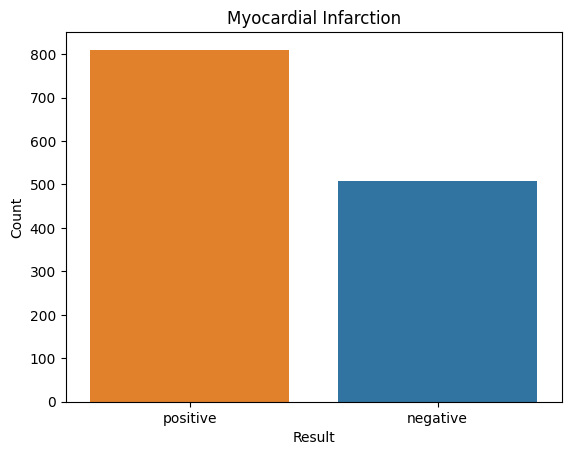

In [179]:
sns.barplot(x=frequency_table_result.index, y= frequency_table_result.values, hue=frequency_table_result, palette = 'tab10', legend = False)
# Adding labels and title for clarity
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Myocardial Infarction')  # Adding title here

# Display the plot
plt.show()

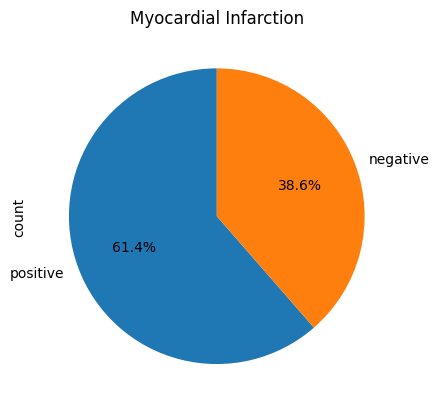

In [180]:
# Plotting a pie chart of the 'MSZoning' column value counts, with percentage labels, 
# starting at angle 90, and using colors from the "Set3" Seaborn palette
df_cleaned['Result'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("tab10"))
plt.title('Myocardial Infarction')  # Adding title here

# Display the plot
plt.show()

**Frequency Table Gender**

In [181]:
# Frequency table for 'Result'
frequency_table_gender = df_cleaned['Gender'].value_counts()
# Calculating the proportion of each unique value in the 'Result'
proportion_table_gender = df_cleaned['Gender'].value_counts(normalize=True)
display(frequency_table_gender, proportion_table_gender)

Gender
1    870
0    449
Name: count, dtype: int64

Gender
1    0.659591
0    0.340409
Name: proportion, dtype: float64

**Viualization Gender**

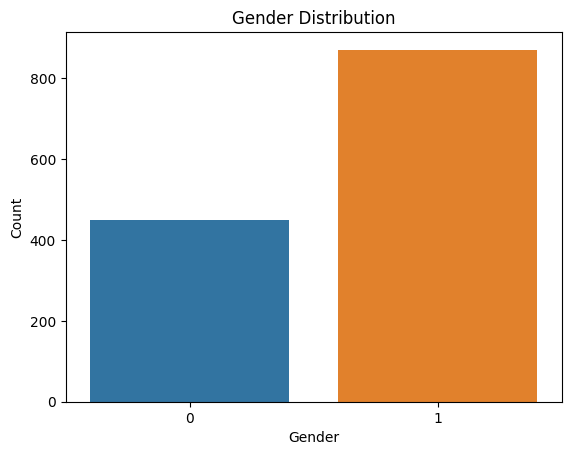

In [182]:
sns.barplot(x=frequency_table_gender.index, y= frequency_table_gender.values, hue=frequency_table_gender, palette = 'tab10', legend = False)
# Adding labels and title for clarity
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')  # Adding title here

# Display the plot
plt.show()

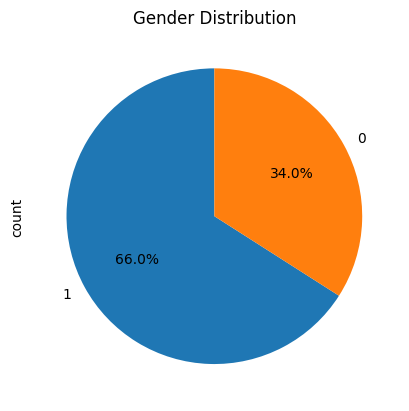

In [183]:
# Plotting a pie chart of the 'MSZoning' column value counts, with percentage labels, 
# starting at angle 90, and using colors from the "Set3" Seaborn palette
df_cleaned['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("tab10"))
plt.title('Gender Distribution')  # Adding title here

# Display the plot
plt.show()

### 4.1.2 Numerical Values

In [184]:
# Extracting columns with numeric  data types to create a numerical dataframe
df_numerical = df_cleaned.select_dtypes("number")
display(df_numerical)

Age  Heart_rate  Systolic_blood_pressure  Diastolic_blood_pressure  \
0      64          66                      160                        83   
1      21          94                       98                        46   
2      55          64                      160                        77   
3      64          70                      120                        55   
4      55          64                      112                        65   
...   ...         ...                      ...                       ...   
1314   44          94                      122                        67   
1315   66          84                      125                        55   
1316   45          85                      168                       104   
1317   54          58                      117                        68   
1318   51          94                      157                        79   

      Blood_sugar  CK-MB  Troponin  
0             160   1.80     0.012  
1             296   6.75     1.060  
2             270   1.99     0.003  
3             270  13.87     0.122  
4             300   1.08     0.003  
...           ...    ...       ...  
1314          204   1.63     0.006  
1315          149   1.33     0.172  
1316           96   1.24     4.250  
1317          443   5.80     0.359  
1318          134  50.89     1.770  

[1319 rows x 7 columns]

In [185]:
# Counting and sorting the unique values for each numerical column in descending order
df_cleaned.select_dtypes("number").nunique().sort_values(ascending=False)

CK-MB                       673
Troponin                    352
Blood_sugar                 243
Systolic_blood_pressure     116
Heart_rate                   79
Age                          75
Diastolic_blood_pressure     73
dtype: int64

In [186]:
# Verifying that the total number of columns in the dataframe is the sum of object (string) and numerical columns
len(df_cleaned.columns) == len(df_cleaned.select_dtypes("object").columns) + len(df_cleaned.select_dtypes("number").columns)

True

**Functions for Measures of Centrality, Measures of Dispersion, Shape of Distribution and Plots**


Columnname: Age

Summary statistics for 'Age':
count    1319.000000
mean       56.191812
std        13.647315
min        14.000000
25%        47.000000
50%        58.000000
75%        65.000000
max       103.000000
Name: Age, dtype: float64

Measures of Centrality for 'Age':
Mean: 56.191811978771796
Median: 58.0
Mode: 60

Measures of Dispersion for 'Age':
Variance: 186.24921970361967
Standard Deviation: 13.647315476078791
Minimum: 14
Maximum: 103
Range: 89
Quantiles: 
0.25    47.0
0.50    58.0
0.75    65.0
Name: Age, dtype: float64

Shape of the Distribution for 'Age':
Skewness: -0.23921873824246861
Kurtosis: -0.023992066974543924


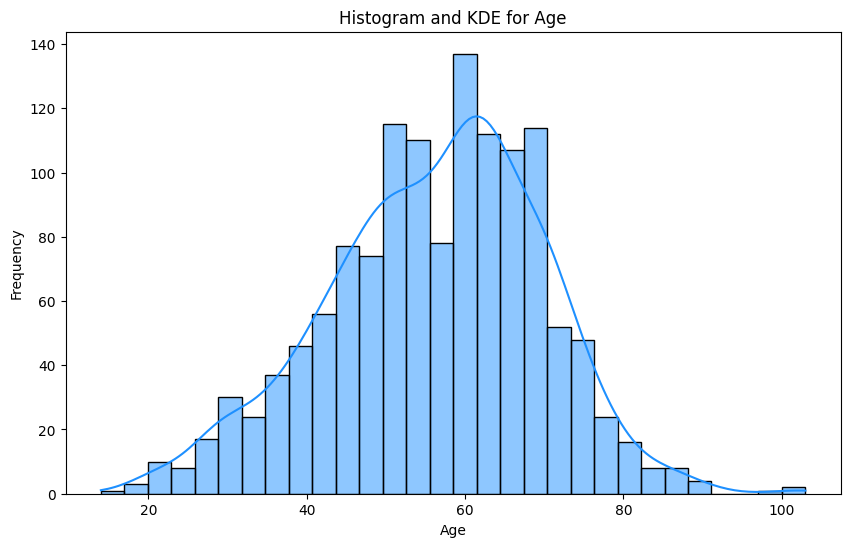

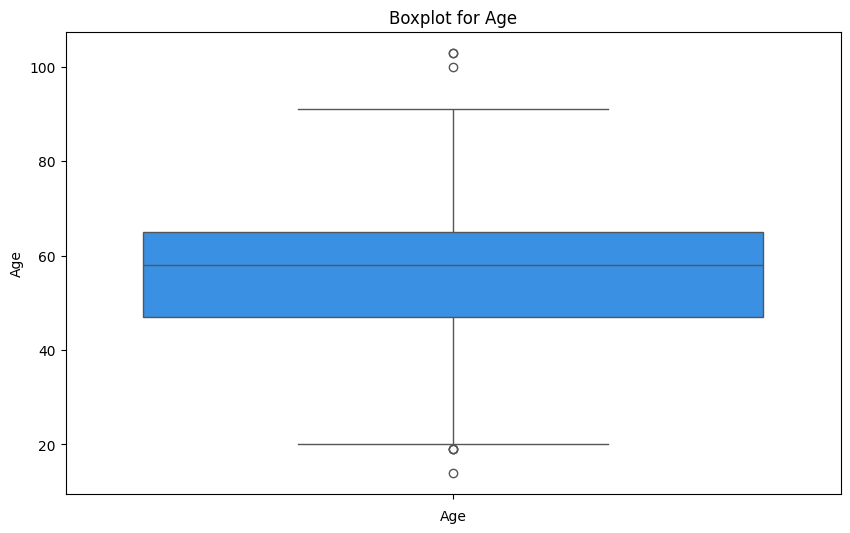

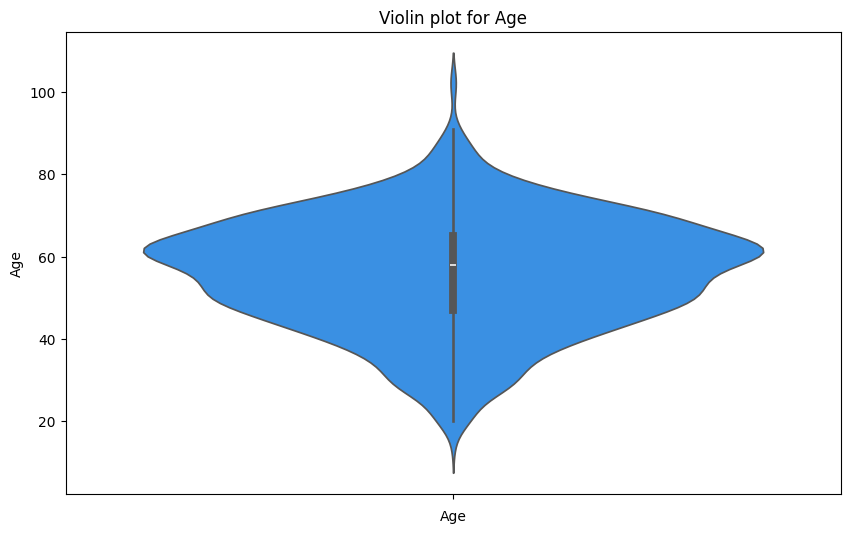

Columnname: Heart_rate

Summary statistics for 'Heart_rate':
count    1319.000000
mean       78.336619
std        51.630270
min        20.000000
25%        64.000000
50%        74.000000
75%        85.000000
max      1111.000000
Name: Heart_rate, dtype: float64

Measures of Centrality for 'Heart_rate':
Mean: 78.3366186504928
Median: 74.0
Mode: 60

Measures of Dispersion for 'Heart_rate':
Variance: 2665.6847809705473
Standard Deviation: 51.630270006756184
Minimum: 20
Maximum: 1111
Range: 1091
Quantiles: 
0.25    64.0
0.50    74.0
0.75    85.0
Name: Heart_rate, dtype: float64

Shape of the Distribution for 'Heart_rate':
Skewness: 18.24771989662879
Kurtosis: 362.9547026291248


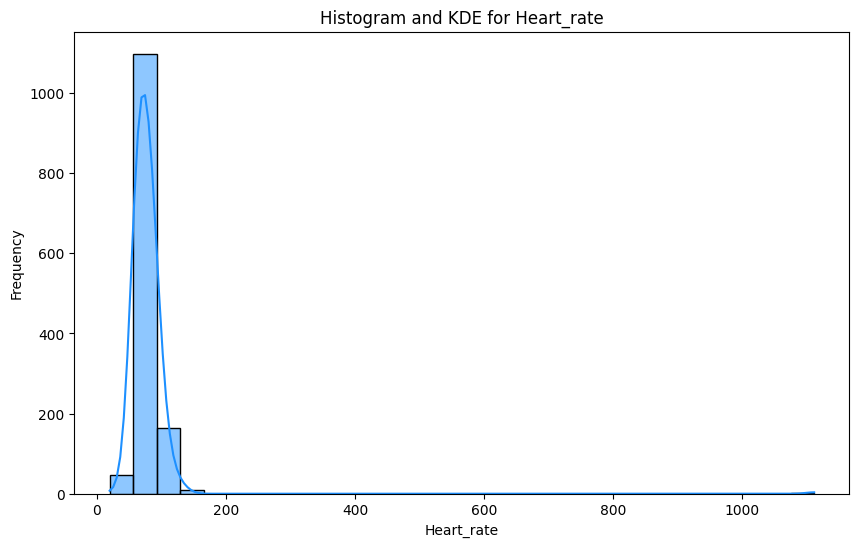

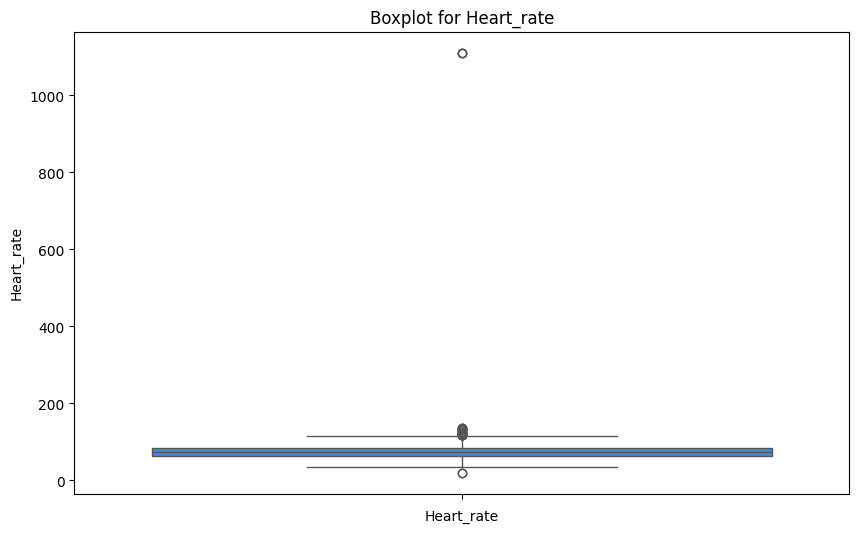

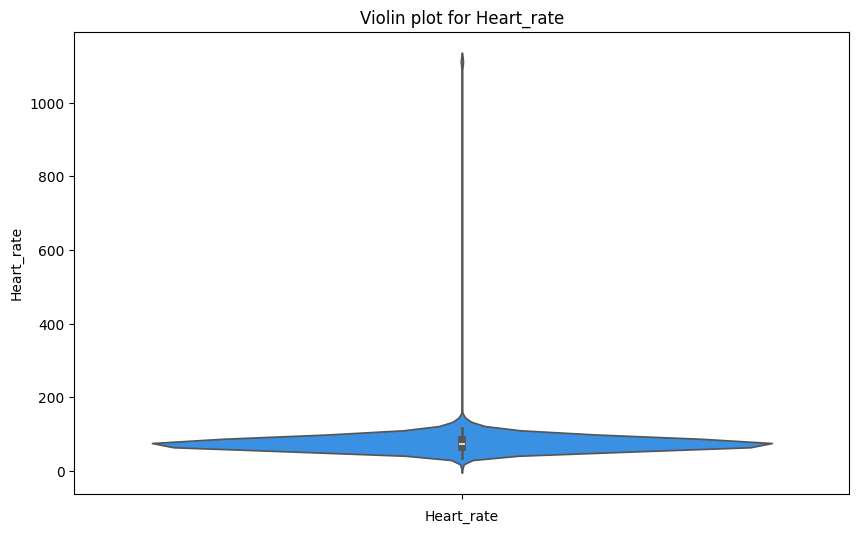

Columnname: Systolic_blood_pressure

Summary statistics for 'Systolic_blood_pressure':
count    1319.000000
mean      127.170584
std        26.122720
min        42.000000
25%       110.000000
50%       124.000000
75%       143.000000
max       223.000000
Name: Systolic_blood_pressure, dtype: float64

Measures of Centrality for 'Systolic_blood_pressure':
Mean: 127.17058377558757
Median: 124.0
Mode: 150

Measures of Dispersion for 'Systolic_blood_pressure':
Variance: 682.396524014031
Standard Deviation: 26.12272045584133
Minimum: 42
Maximum: 223
Range: 181
Quantiles: 
0.25    110.0
0.50    124.0
0.75    143.0
Name: Systolic_blood_pressure, dtype: float64

Shape of the Distribution for 'Systolic_blood_pressure':
Skewness: 0.6852460958110306
Kurtosis: 0.9519274464977725


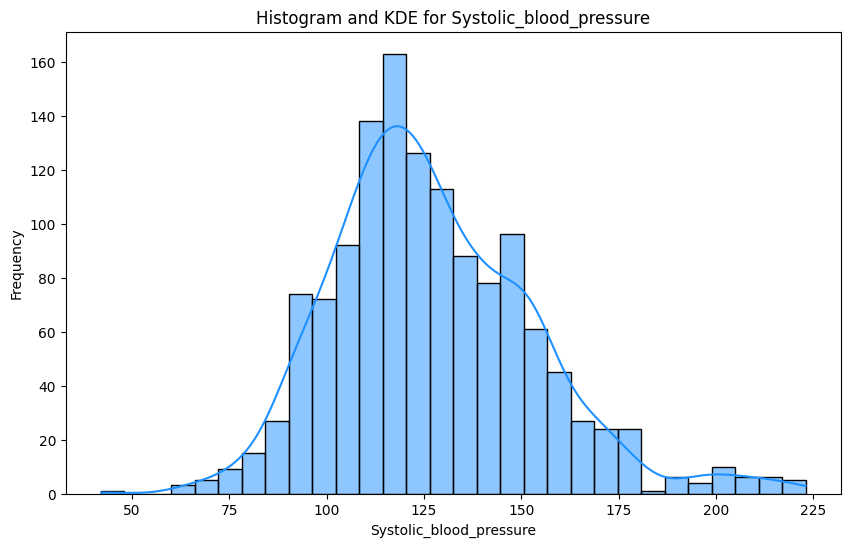

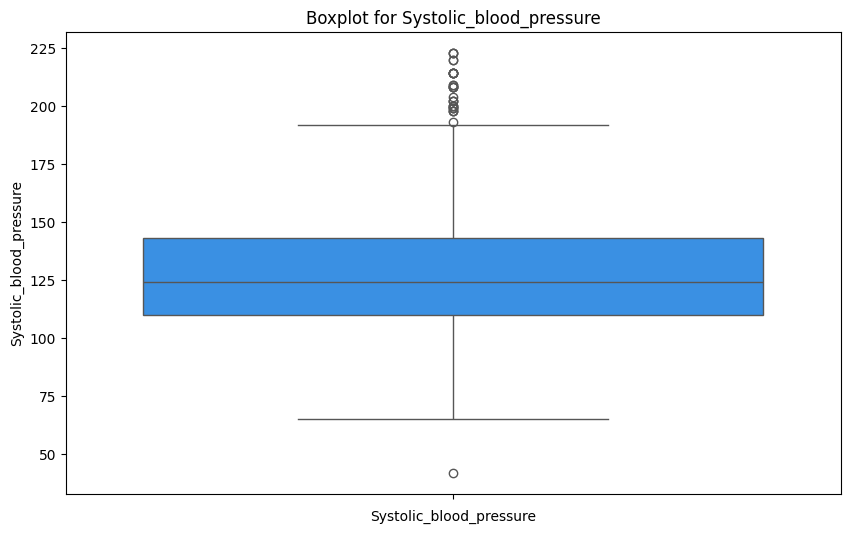

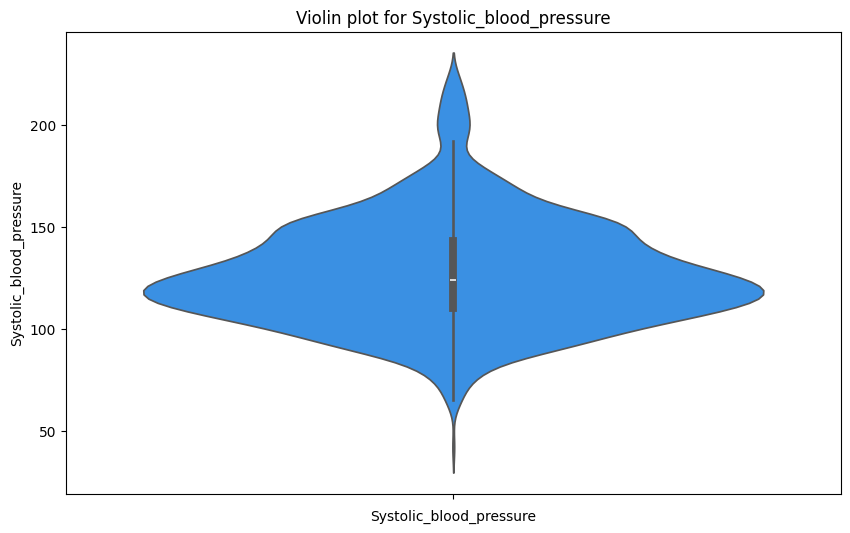

Columnname: Diastolic_blood_pressure

Summary statistics for 'Diastolic_blood_pressure':
count    1319.000000
mean       72.269143
std        14.033924
min        38.000000
25%        62.000000
50%        72.000000
75%        81.000000
max       154.000000
Name: Diastolic_blood_pressure, dtype: float64

Measures of Centrality for 'Diastolic_blood_pressure':
Mean: 72.26914329037149
Median: 72.0
Mode: 75

Measures of Dispersion for 'Diastolic_blood_pressure':
Variance: 196.95102741420192
Standard Deviation: 14.033924163048692
Minimum: 38
Maximum: 154
Range: 116
Quantiles: 
0.25    62.0
0.50    72.0
0.75    81.0
Name: Diastolic_blood_pressure, dtype: float64

Shape of the Distribution for 'Diastolic_blood_pressure':
Skewness: 0.48920228416877803
Kurtosis: 0.8653222430996901


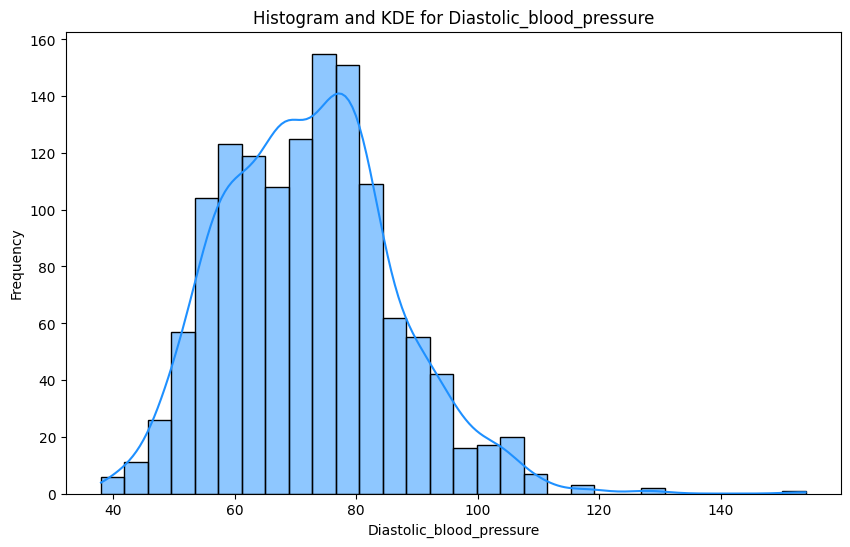

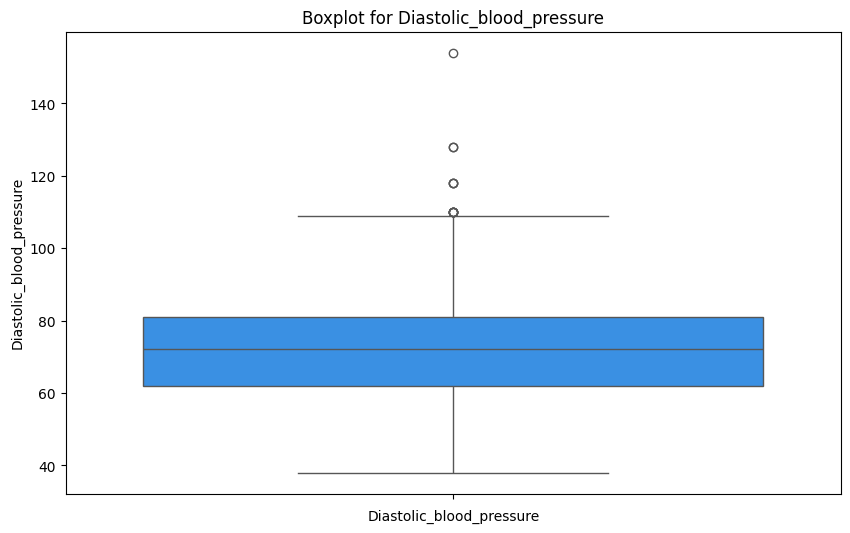

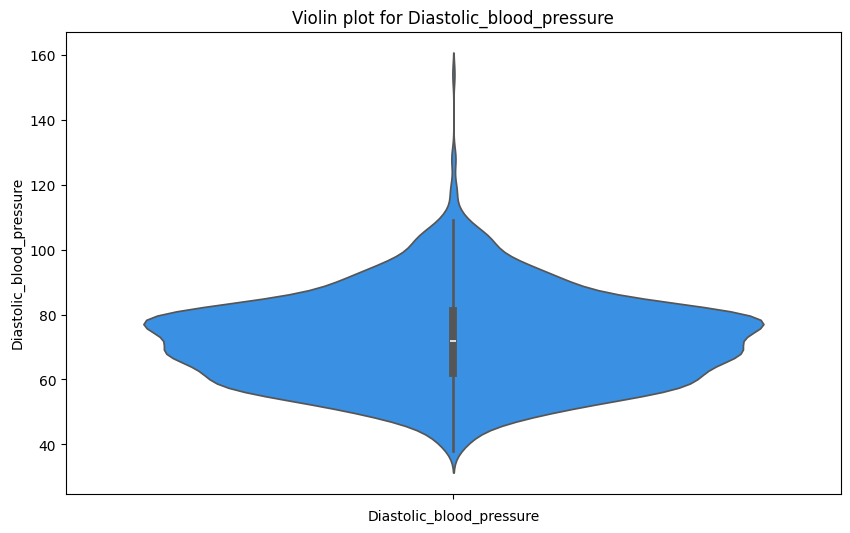

Columnname: Blood_sugar

Summary statistics for 'Blood_sugar':
count    1319.000000
mean      146.633813
std        74.922338
min        35.000000
25%        98.000000
50%       116.000000
75%       169.500000
max       541.000000
Name: Blood_sugar, dtype: float64

Measures of Centrality for 'Blood_sugar':
Mean: 146.63381349507202
Median: 116.0
Mode: 100

Measures of Dispersion for 'Blood_sugar':
Variance: 5613.356701000092
Standard Deviation: 74.92233779721566
Minimum: 35
Maximum: 541
Range: 506
Quantiles: 
0.25     98.0
0.50    116.0
0.75    169.5
Name: Blood_sugar, dtype: float64

Shape of the Distribution for 'Blood_sugar':
Skewness: 1.933513190007737
Kurtosis: 4.1206648374687695


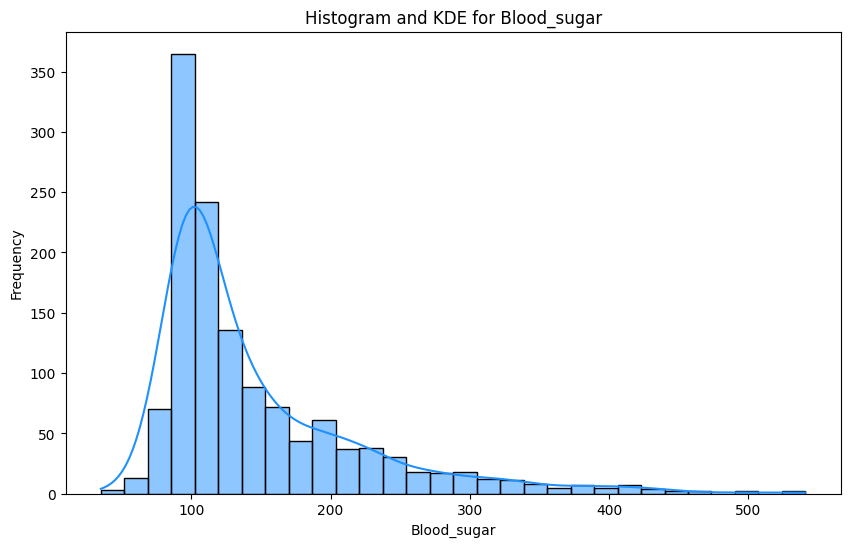

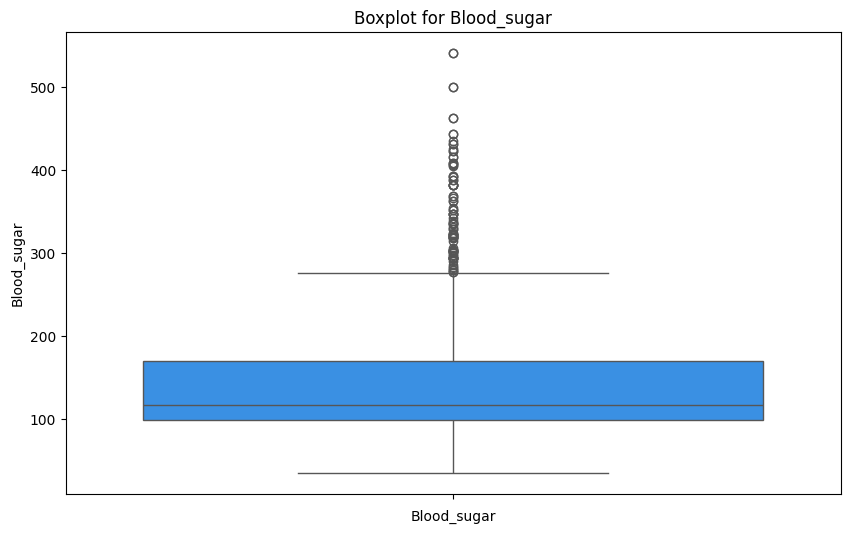

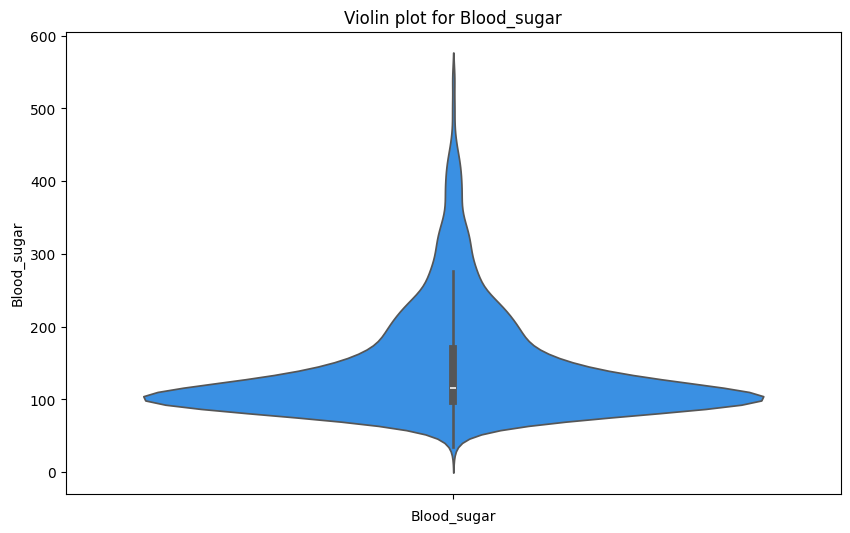

Columnname: CK-MB

Summary statistics for 'CK-MB':
count    1319.000000
mean       15.274314
std        46.327081
min         0.320000
25%         1.655000
50%         2.850000
75%         5.805000
max       300.000000
Name: CK-MB, dtype: float64

Measures of Centrality for 'CK-MB':
Mean: 15.274313874147081
Median: 2.85
Mode: 300.0

Measures of Dispersion for 'CK-MB':
Variance: 2146.1984118012565
Standard Deviation: 46.327080760622685
Minimum: 0.32
Maximum: 300.0
Range: 299.68
Quantiles: 
0.25    1.655
0.50    2.850
0.75    5.805
Name: CK-MB, dtype: float64

Shape of the Distribution for 'CK-MB':
Skewness: 4.978095614806701
Kurtosis: 25.490559887560664


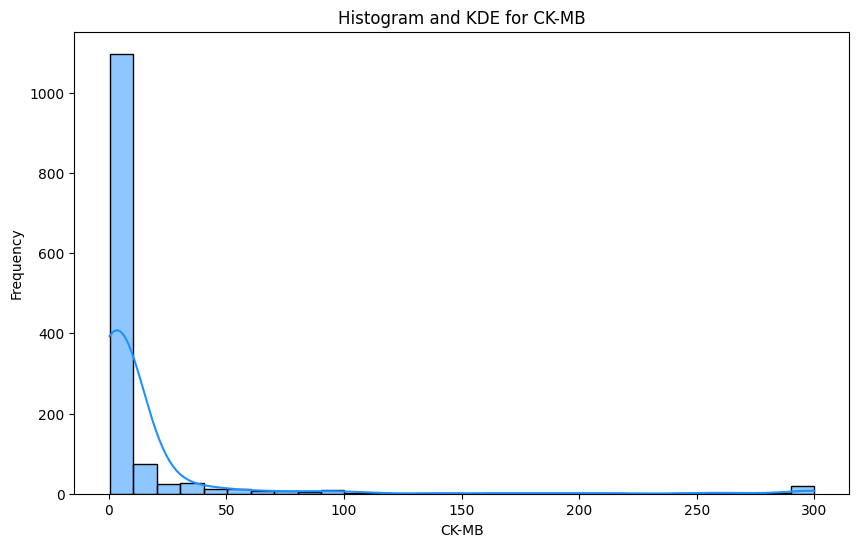

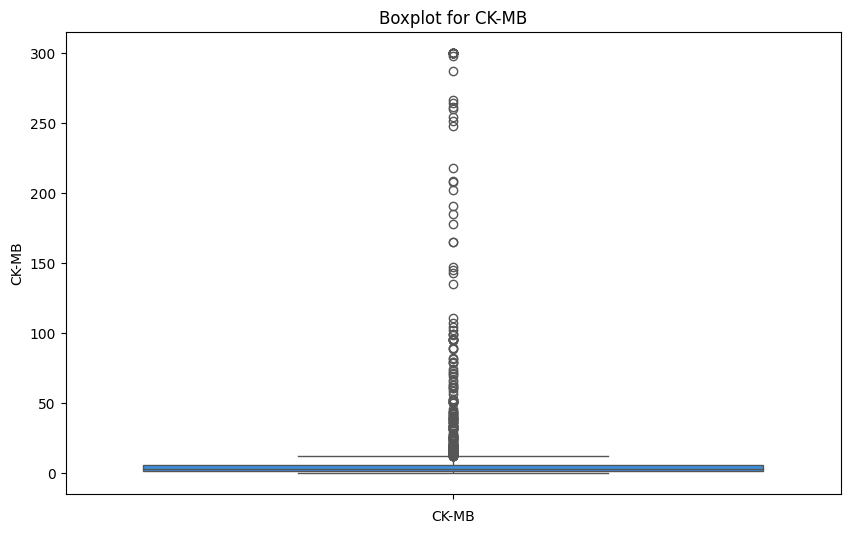

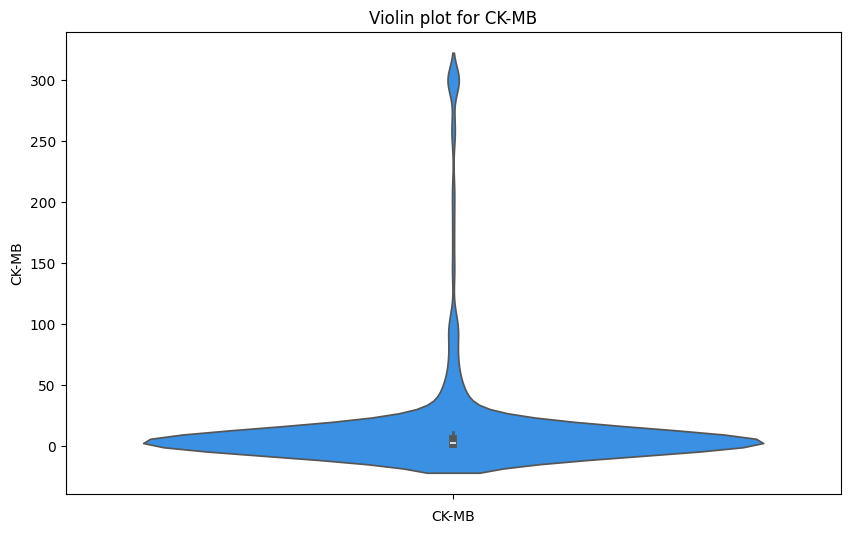

Columnname: Troponin

Summary statistics for 'Troponin':
count    1319.000000
mean        0.360942
std         1.154568
min         0.001000
25%         0.006000
50%         0.014000
75%         0.085500
max        10.300000
Name: Troponin, dtype: float64

Measures of Centrality for 'Troponin':
Mean: 0.3609423805913571
Median: 0.014
Mode: 0.003

Measures of Dispersion for 'Troponin':
Variance: 1.333026492883858
Standard Deviation: 1.1545676649221812
Minimum: 0.001
Maximum: 10.3
Range: 10.299000000000001
Quantiles: 
0.25    0.0060
0.50    0.0140
0.75    0.0855
Name: Troponin, dtype: float64

Shape of the Distribution for 'Troponin':
Skewness: 5.799106921990377
Kurtosis: 40.01658826744304


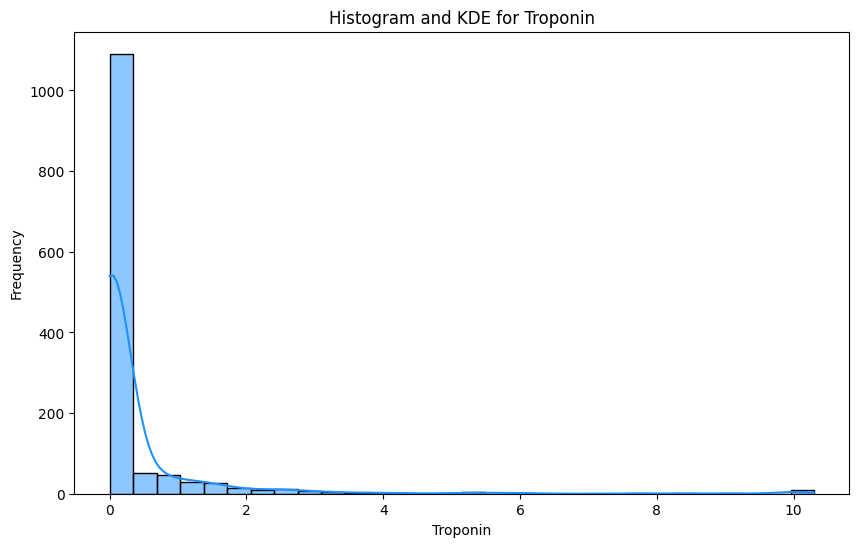

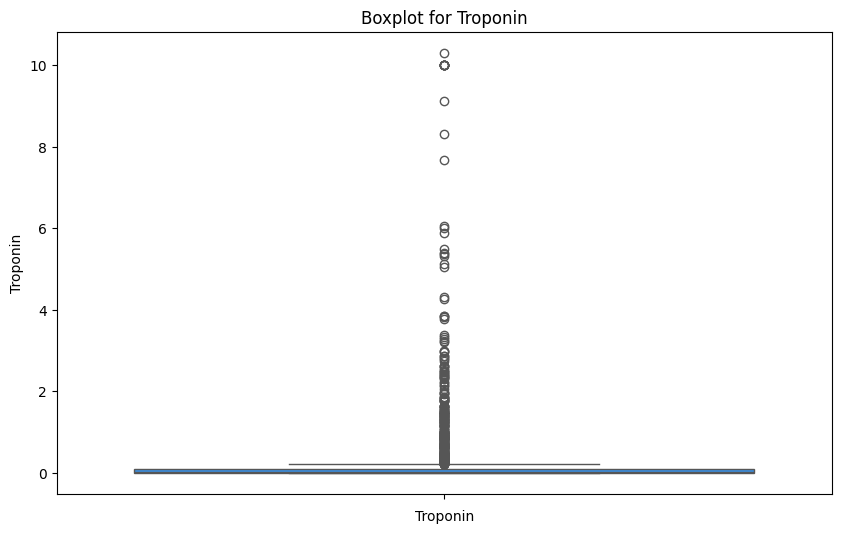

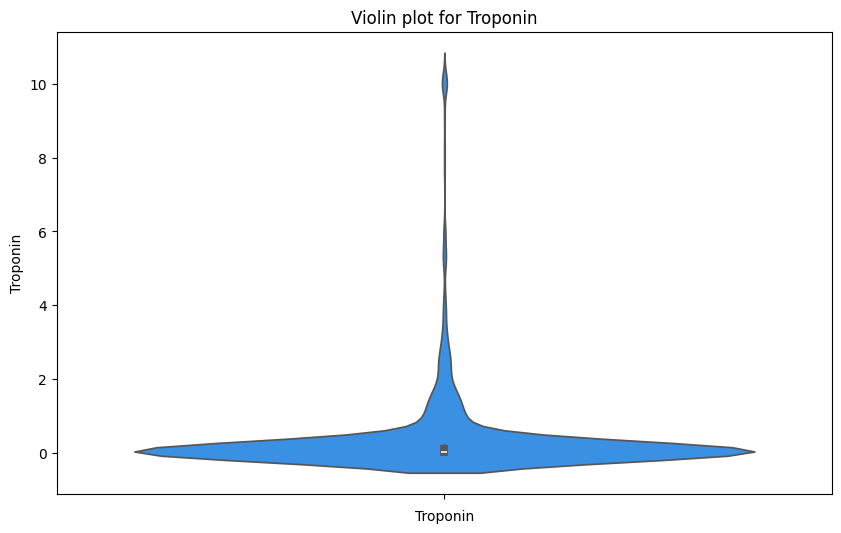

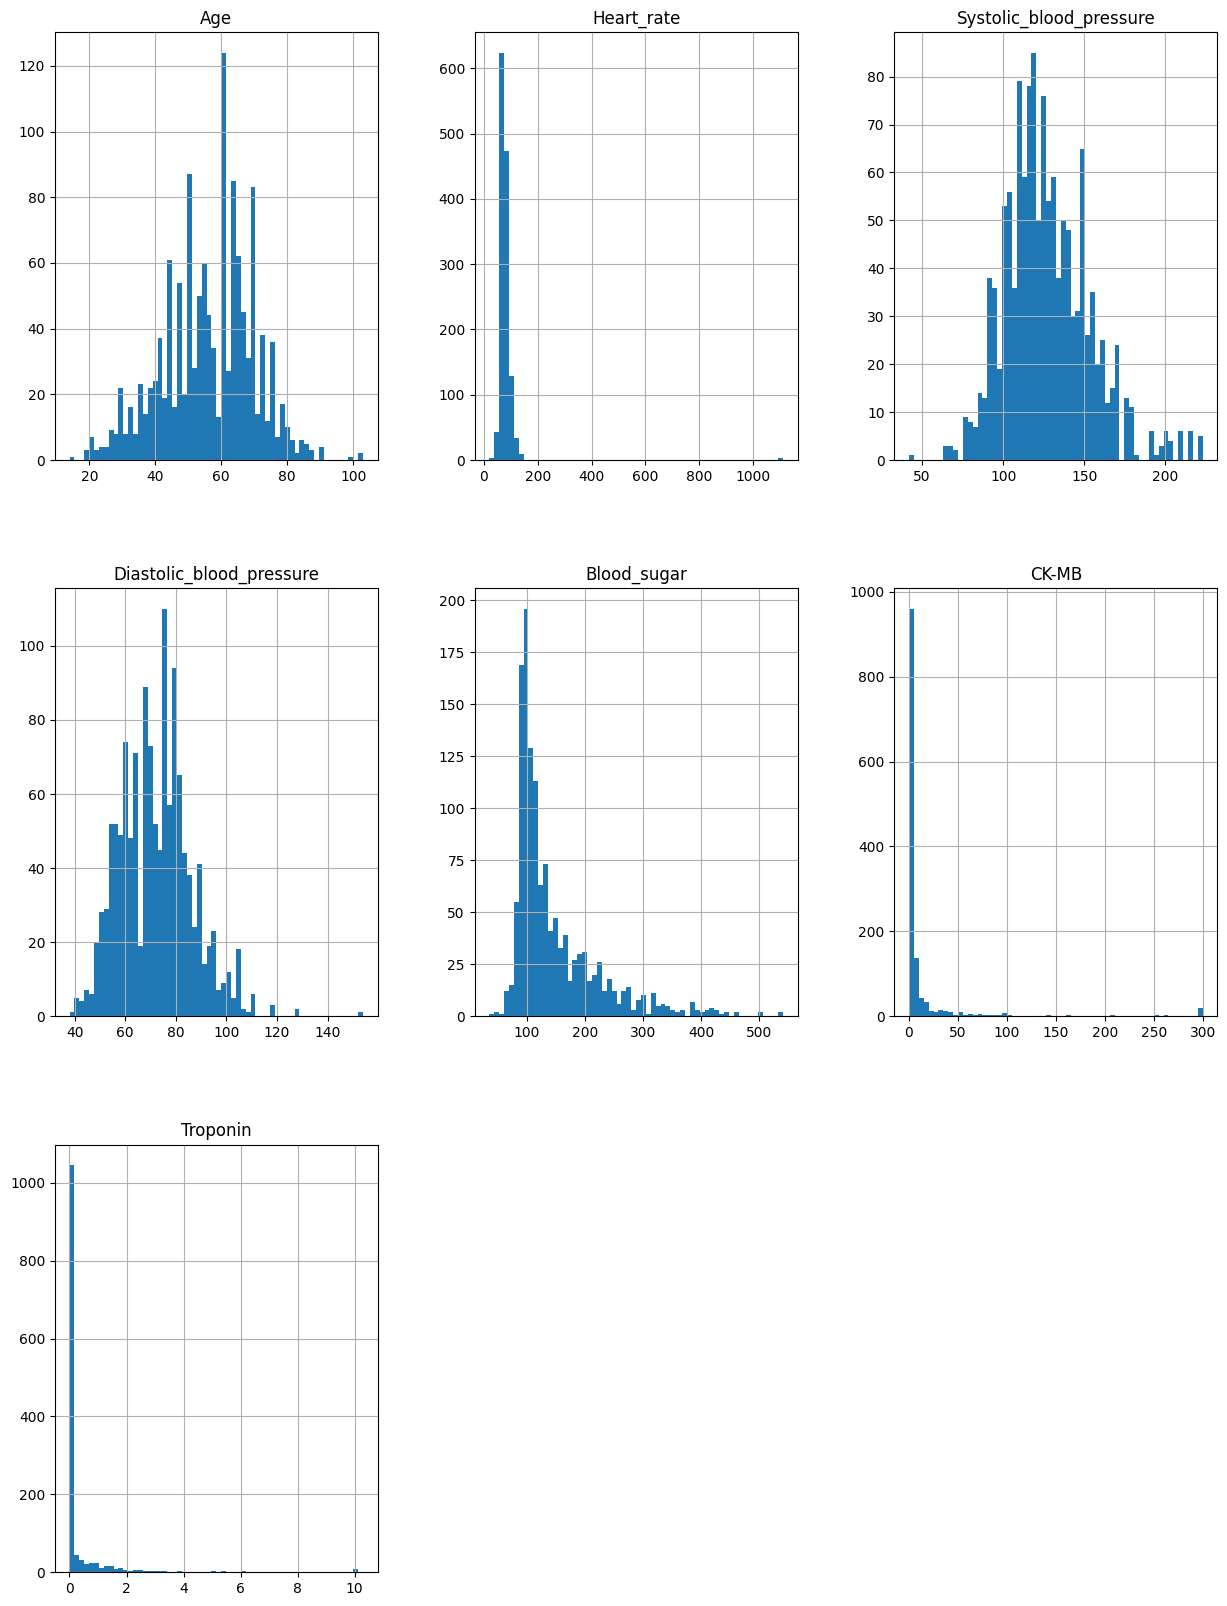

In [187]:
print()

# Iteration over all columns in the dataframe
for column in df_numerical.columns:
    print_yellow_and_bold(f"Columnname: {column}")
    
    print()
    
    # Summary statistics for the column
    print("Summary statistics for '{}':".format(column))
    print(df_numerical[column].describe())
    
    # Measures of Centrality
    mean_value = df_numerical[column].mean()
    median_value = df_numerical[column].median()
    mode_value = df_numerical[column].mode()[0]
    
    print("\nMeasures of Centrality for '{}':".format(column))
    print(f"Mean: {mean_value}")
    print(f"Median: {median_value}")
    print(f"Mode: {mode_value}")
    
    # Measures of Dispersion
    variance_value = df_numerical[column].var()
    std_dev_value = df_numerical[column].std()
    min_value = df_numerical[column].min()
    max_value = df_numerical[column].max()
    range_value = max_value - min_value
    quantiles_value = df_numerical[column].quantile([0.25, 0.5, 0.75])
    
    print("\nMeasures of Dispersion for '{}':".format(column))
    print(f"Variance: {variance_value}")
    print(f"Standard Deviation: {std_dev_value}")
    print(f"Minimum: {min_value}")
    print(f"Maximum: {max_value}")
    print(f"Range: {range_value}")
    print(f"Quantiles: \n{quantiles_value}")
    
    # Shape of the Distribution
    skewness_value = df_numerical[column].skew()
    kurtosis_value = df_numerical[column].kurtosis()
    
    print("\nShape of the Distribution for '{}':".format(column))
    print(f"Skewness: {skewness_value}")
    print(f"Kurtosis: {kurtosis_value}")
    
    # Plotting a histogram with KDE
    plt.figure(figsize=(10, 6))
    sns.histplot(df_numerical[column], kde=True, bins=30, color="dodgerblue")
    plt.title(f'Histogram and KDE for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    
    # Plotting a boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_numerical[column], color="dodgerblue")
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)
    plt.show()
    
    # Plotting a violin plot
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=df_numerical[column], color="dodgerblue")
    plt.title(f'Violin plot for {column}')
    plt.xlabel(column)
    plt.show()

print()

# Creating histograms for each numerical column in 'df_numerical'
df_numerical.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10)
plt.show()

### 4.1.3 Outliers

<Axes: >

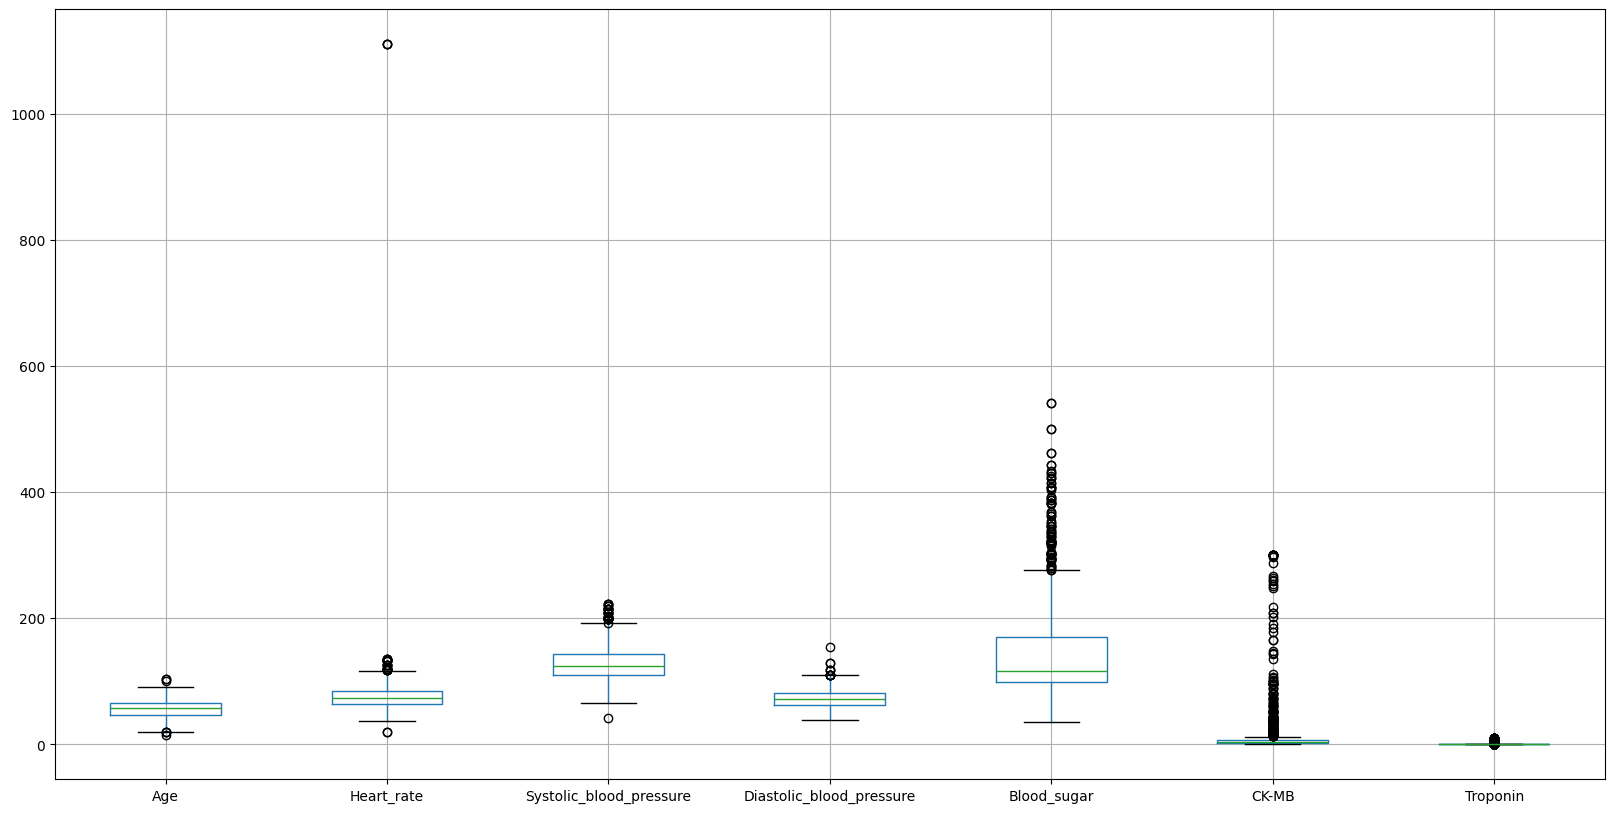

In [188]:
df_cleaned.boxplot(figsize=(20,10))

**Heartrate**

In [189]:
df_numericaldf_heartrate = df_cleaned.sort_values(by='Heart_rate', ascending=False)
display(df_numericaldf_heartrate.head(10))

Age Gender  Heart_rate  Systolic_blood_pressure  \
1069   32      0        1111                      141   
717    70      0        1111                      141   
63     45      1        1111                      141   
682    68      1         135                       98   
1012   65      1         135                       98   
21     48      1         135                       98   
346    60      1         134                      111   
1213   76      1         134                      111   
842    63      1         134                      111   
457    65      1         132                      125   

      Diastolic_blood_pressure  Blood_sugar   CK-MB  Troponin    Result  
1069                        95           82    2.66     0.008  negative  
717                         95          138    3.87     0.028  positive  
63                          95          109    1.33     1.010  positive  
682                         60           96  254.40     0.025  positive  
1012                        60          162    7.67     0.025  positive  
21                          60          100   94.79     0.004  positive  
346                         69          163    3.08     0.025  positive  
1213                        69           92    2.37     0.031  positive  
842                         69          132   44.18     0.065  positive  
457                         74          196    1.42     0.004  negative

In [190]:
display(df_numericaldf_heartrate.tail(20))

Age Gender  Heart_rate  Systolic_blood_pressure  \
355    43      0          52                      125   
564    51      1          52                      150   
852    57      1          51                      130   
1223   57      1          51                      130   
1282   67      0          51                      143   
911    74      1          51                      143   
532    53      1          51                      118   
354    63      0          51                      130   
478    55      0          50                      110   
563    70      0          50                      150   
562    70      1          49                      170   
566    61      1          46                      116   
1190   70      0          45                      130   
995    32      1          40                      179   
6      32      0          40                      179   
1313   86      0          40                      179   
666    53      1          40                      179   
1024   65      1          36                      106   
1060   63      0          20                      110   
708    42      1          20                      110   

      Diastolic_blood_pressure  Blood_sugar  CK-MB  Troponin    Result  
355                         68          100   0.98     0.007  negative  
564                         75           85   3.49     0.003  negative  
852                         70           92   4.25     0.008  negative  
1223                        70           91   0.48     0.279  positive  
1282                        75          102   1.31     0.030  positive  
911                         75           96   2.05     0.015  positive  
532                         50           60   1.78     0.007  negative  
354                         70           77   3.20     0.006  negative  
478                         90          219   6.78     2.530  positive  
563                         70          181   2.20     0.024  positive  
562                         80          151   5.73     0.025  positive  
566                         59          122   3.42     0.013  negative  
1190                        58          175   2.84     0.053  positive  
995                         68          167   9.63     0.004  positive  
6                           68          102   0.71     0.003  negative  
1313                        68          147   5.22     0.011  negative  
666                         68          197   2.37     3.210  positive  
1024                        58           88   1.25     0.088  positive  
1060                        90          122   0.68     1.510  positive  
708                         90          108   4.93     0.010  negative

In [191]:
# Filter out rows where 'Heart_rate' is outside the range [35, 220]
df_no_outliers = df_cleaned[(df_cleaned['Heart_rate'] >= 35) & (df_cleaned['Heart_rate'] <= 220)]

**Systolic Blood Pressure**

In [192]:
df_numericaldf_sysblood = df_cleaned.sort_values(by='Systolic_blood_pressure', ascending=False)
display(df_numericaldf_sysblood.head(30))

Age Gender  Heart_rate  Systolic_blood_pressure  \
999    29      0          74                      223   
670    51      1          74                      223   
486    63      1          74                      223   
220    60      0         110                      220   
1285   50      0         120                      220   
996    63      0          60                      214   
1140   40      1          89                      214   
667    65      1          60                      214   
7      63      1          60                      214   
781    78      0          89                      214   
427    58      0          69                      214   
896   100      1          60                      209   
1267   60      0          60                      209   
1035   50      1          74                      208   
311    63      1          74                      208   
1302   40      1          57                      208   
926    51      1          57                      208   
428    21      1          85                      204   
744    70      1          60                      202   
1096   30      1          60                      202   
89     61      1          60                      202   
969    63      1          81                      200   
429    44      0          65                      200   
645    47      0          81                      200   
673    47      1          60                      199   
1003   68      1          60                      199   
12     64      1          60                      199   
411    74      0          90                      198   
857    58      0          90                      198   
1228   63      1          90                      198   

      Diastolic_blood_pressure  Blood_sugar   CK-MB  Troponin    Result  
999                        118           86    4.93     0.003  positive  
670                        118          105    1.60     0.004  negative  
486                        118          161    2.97     0.628  positive  
220                        128          101    1.28     0.002  negative  
1285                       128           76    0.93     0.072  positive  
996                         82           85    1.21     0.003  negative  
1140                        88          100    6.03     0.003  negative  
667                         82          189    1.21     0.067  positive  
7                           82           87  300.00     2.370  positive  
781                         88          434    7.26     0.009  positive  
427                         88           95  185.10     0.011  positive  
896                         75          329    5.66     0.840  positive  
1267                        75          500    1.49     0.019  positive  
1035                       100          244    3.20     0.008  negative  
311                        100          100    2.54     0.145  positive  
1302                        40          108    2.11     0.003  negative  
926                         40          247   11.07     0.230  positive  
428                         84           93    2.71     0.002  negative  
744                         88           94    1.07     0.407  positive  
1096                        88          197   12.89     0.003  positive  
89                          88          111    0.63     6.050  positive  
969                        110          208    2.50     0.009  negative  
429                         80          261  207.50     0.004  positive  
645                        110           97   13.73     0.959  positive  
673                         99          123    1.16     0.817  positive  
1003                        99          115    2.67    10.000  positive  
12                          99           92    3.43     5.370  positive  
411                         48          102   38.94     0.052  positive  
857                         48          206    2.73     0.003  negative  
1228              

In [193]:
display(df_numericaldf_sysblood.tail(10))

Age Gender  Heart_rate  Systolic_blood_pressure  \
317    21      0          62                       76   
151    55      1          92                       71   
150    45      0          86                       70   
515    56      1          61                       67   
1271   39      0          61                       67   
900    57      0          61                       67   
297    91      1          80                       65   
806    40      1          80                       65   
1170   43      1          80                       65   
209    60      1          68                       42   

      Diastolic_blood_pressure  Blood_sugar   CK-MB  Troponin    Result  
317                         55          111    3.11     0.003  negative  
151                         93          127    1.80     0.009  negative  
150                         92           90    4.76     0.003  negative  
515                         80           91    2.09     0.004  negative  
1271                        80          145    1.60     0.005  negative  
900                         80          204   33.09     0.003  positive  
297                         53           94    5.37     0.013  negative  
806                         53          139  190.70     0.003  positive  
1170                        53           88    2.54     0.007  negative  
209                         64          106    0.88     0.426  negative

## 4.2 Bivariate Analysis

### 4.2.1 Categorical / Categrocial

In [194]:
crosstab_cat = pd.crosstab(df['Result'], df['Gender'])
display(crosstab_cat)

Gender      0    1
Result            
negative  202  307
positive  247  563

**Chi-Square Test**

Chi-square tests
Tests the independence of two categorical variables by comparing observed frequencies to expected frequencies.

- The chi-square test is a statistical test used to **determine whether there is a significant association between two categorical variables**.
- Interpretation: if p-value < 0.05, this suggests that there is a significant association between the categorical variables. P-value >= 0.05, indicates that there is not enough evidence to conclude a significant association between the variables.

In [195]:
# Chi-square test for 'Result' and 'Gender'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_cat)

chi2_statistic, chi2_p_value

(np.float64(11.356315071387128), np.float64(0.000751918610048385))

**Cramer's V**

While the Chi-square test informs us about the independence of two categorical variables, Cramér's V measures the strength of the association between them.

- Cramer's V is a measure of association used to **quantify the strength of the relationship between categorical variables**.
- Interpretation: Cramer's V ranges from 0 to 1, where **0 indicates no association, and 1 represents a perfect association between the variables**. A higher value of Cramer's V indicates a stronger relationship between the categorical variables.

In [196]:
# Computing the association between variables in 'crosstab_cat' using the "cramer" method
association(crosstab_cat, method="cramer")

0.09443231452352245

**Visualization**

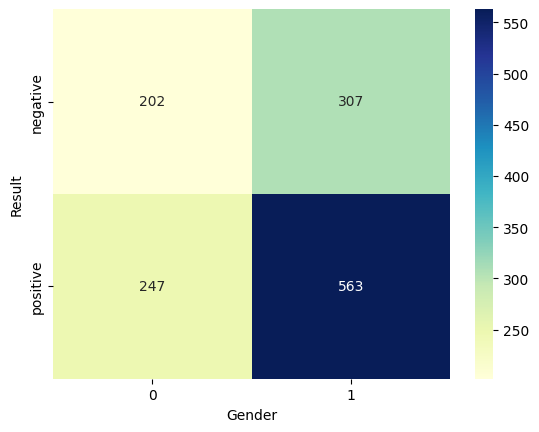

In [197]:
# Plotting a heatmap for the 'crosstab_cat' data, annotating each cell with the value, using the "YlGnBu" color map and formatting numbers as integers
sns.heatmap(crosstab_cat, annot=True, cmap="YlGnBu", fmt="d");

### 4.2.2. Categorical / Numerical

**Result**

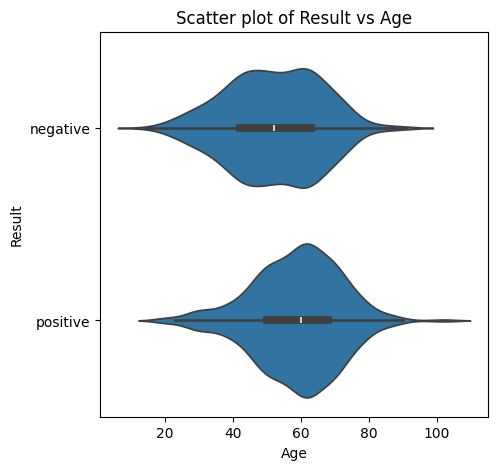

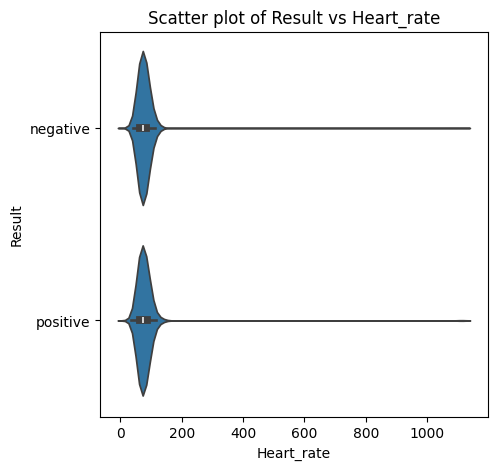

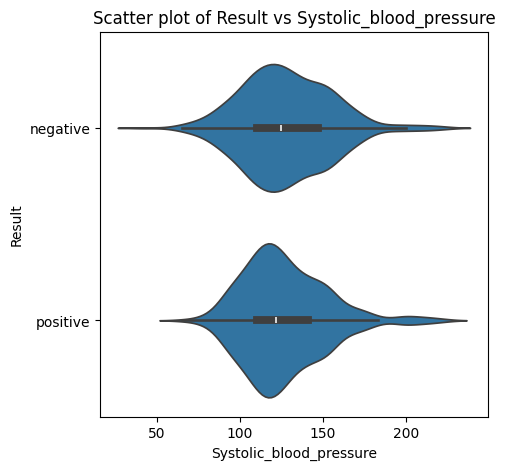

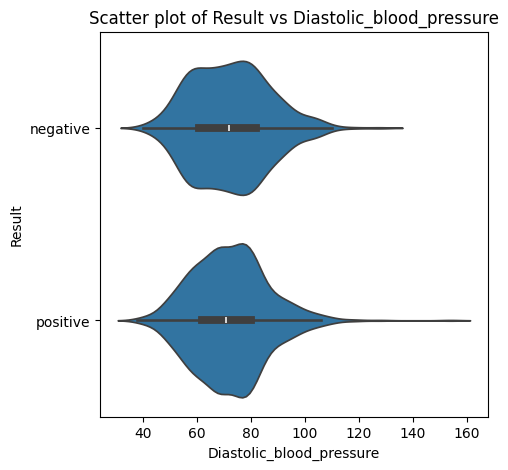

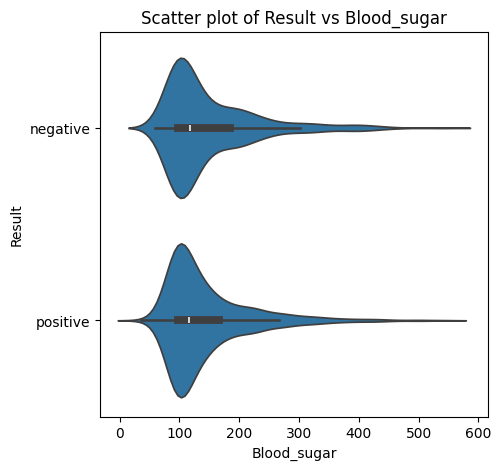

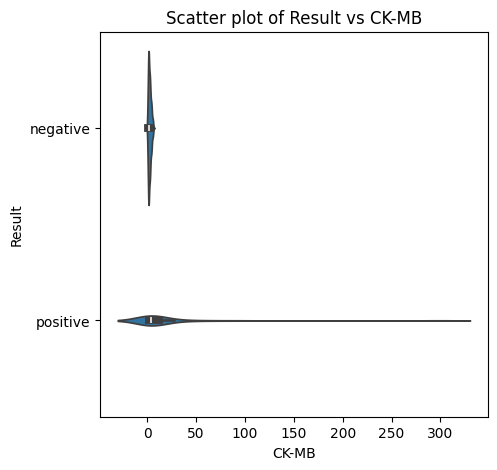

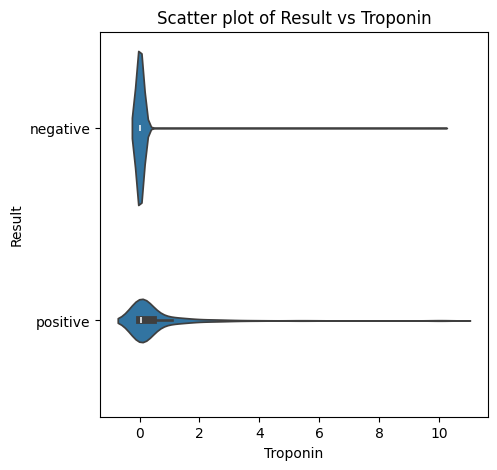

In [198]:
# Plotting scatter plots for each numerical column 
for col in df_numerical.columns:
    plt.figure(figsize=(5, 5))
    plt.title('Scatter plot of Result vs ' + col)
    sns.violinplot(data=df_cleaned, x=col, y='Result')
    plt.show()

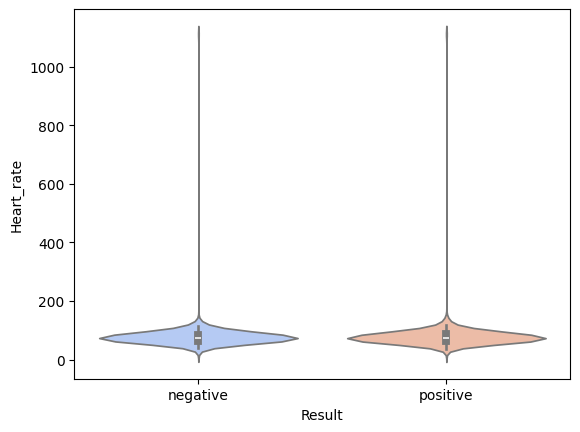

In [199]:
# Plotting a violin plot to visualize the distribution
sns.violinplot(data=df_cleaned, x='Result', y='Heart_rate', palette="coolwarm", hue='Result', legend=False);

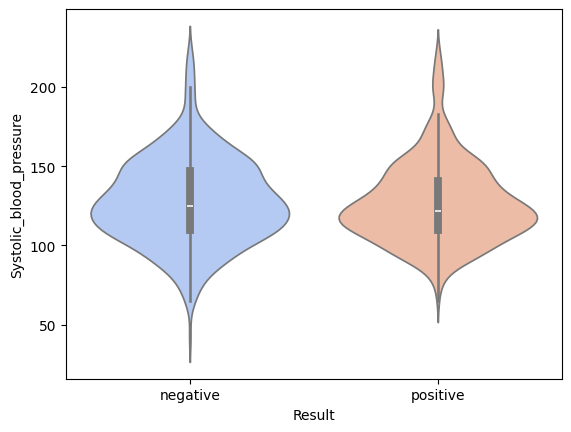

In [200]:
# Plotting a violin plot to visualize the distribution
sns.violinplot(data=df_cleaned, x='Result', y='Systolic_blood_pressure', palette="coolwarm", hue='Result', legend=False);

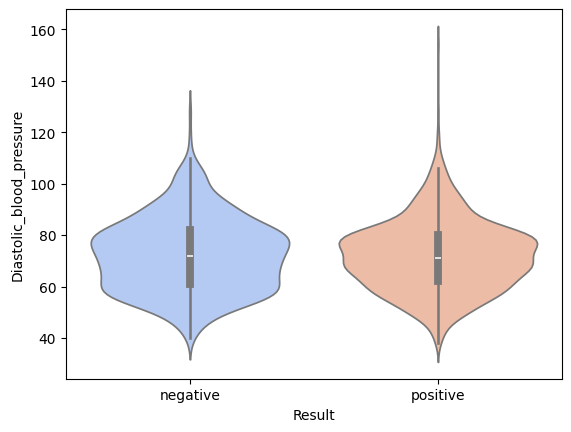

In [201]:
# Plotting a violin plot to visualize the distribution
sns.violinplot(data=df_cleaned, x='Result', y='Diastolic_blood_pressure', palette="coolwarm", hue='Result', legend=False);

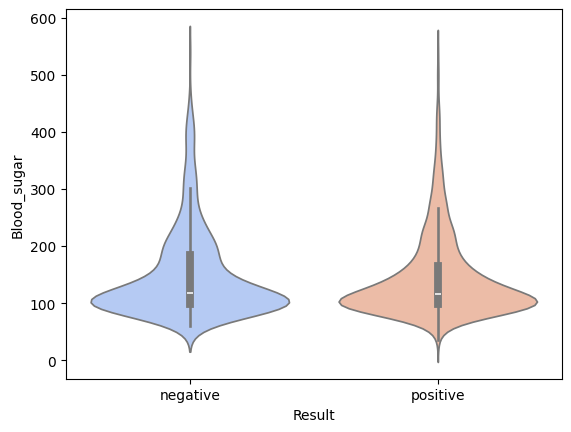

In [202]:
# Plotting a violin plot to visualize the distribution
sns.violinplot(data=df_cleaned, x='Result', y='Blood_sugar', palette="coolwarm", hue='Result', legend=False);

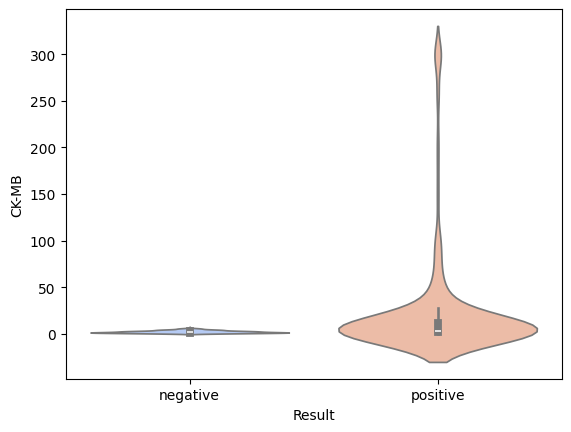

In [203]:
# Plotting a violin plot to visualize the distribution
sns.violinplot(data=df_cleaned, x='Result', y='CK-MB', palette="coolwarm", hue='Result', legend=False);

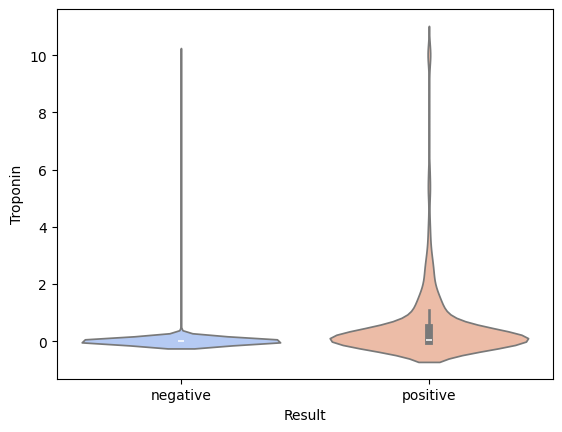

In [204]:
# Plotting a violin plot to visualize the distribution
sns.violinplot(data=df_cleaned, x='Result', y='Troponin', palette="coolwarm", hue='Result', legend=False);

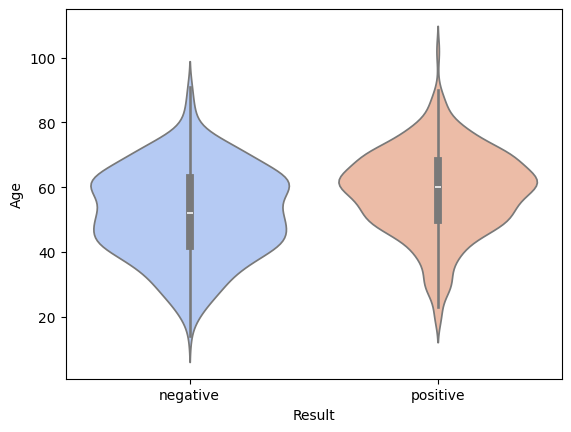

In [205]:
# Plotting a violin plot to visualize the distribution
sns.violinplot(data=df_cleaned, x='Result', y='Age', palette="coolwarm", hue='Result', legend=False);

**Gender**

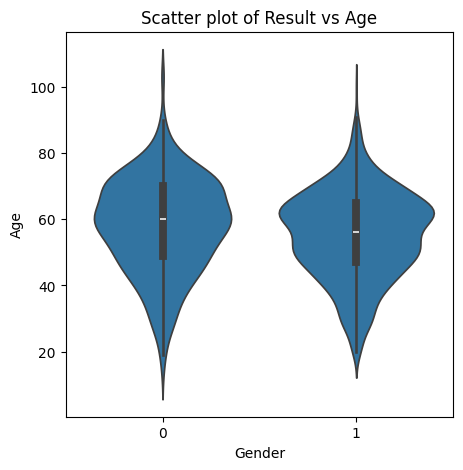

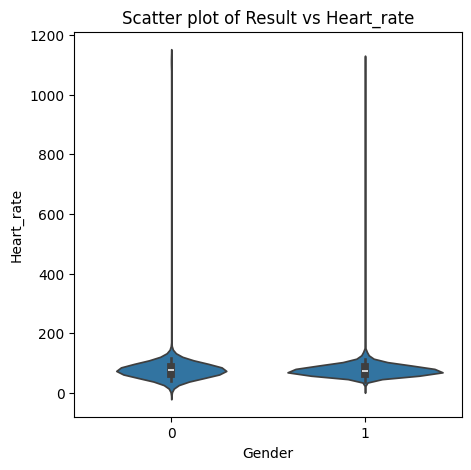

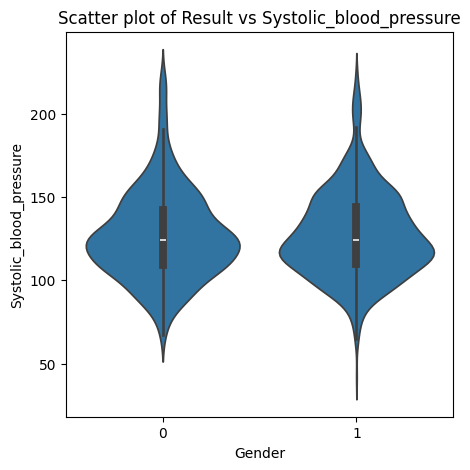

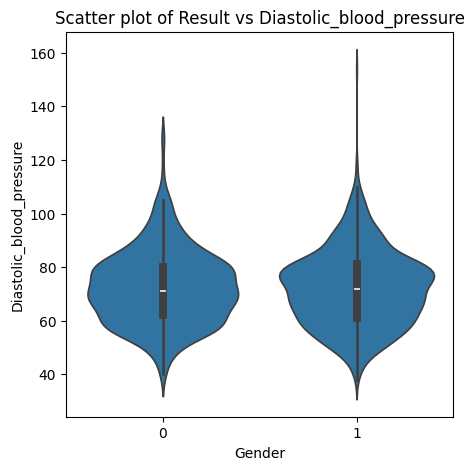

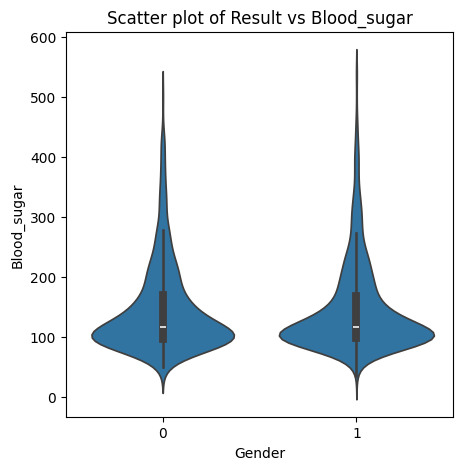

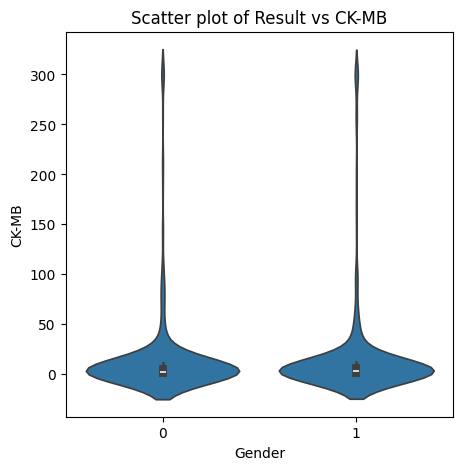

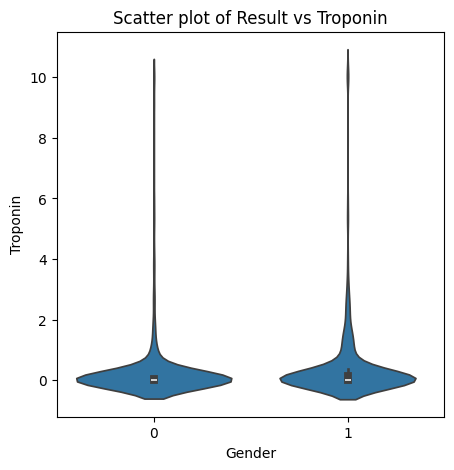

In [206]:

# Plotting scatter plots for each numerical column 
for col in df_numerical.columns:
    plt.figure(figsize=(5, 5))
    plt.title('Scatter plot of Result vs ' + col)
    sns.violinplot(data=df_cleaned, x='Gender', y=col)
    plt.show()

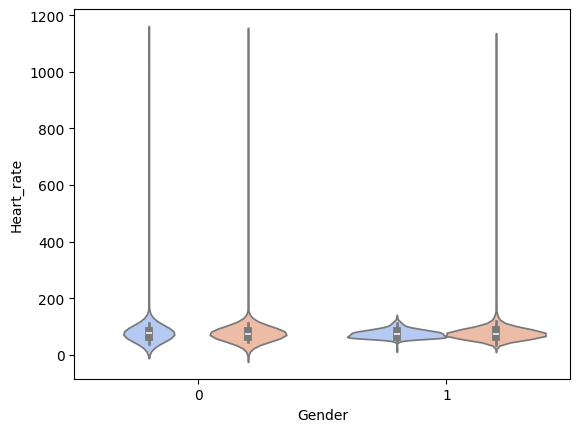

In [207]:
# Plotting a violin plot to visualize the distribution
sns.violinplot(data=df_cleaned, x='Gender', y='Heart_rate', palette="coolwarm", hue='Result', legend=False);

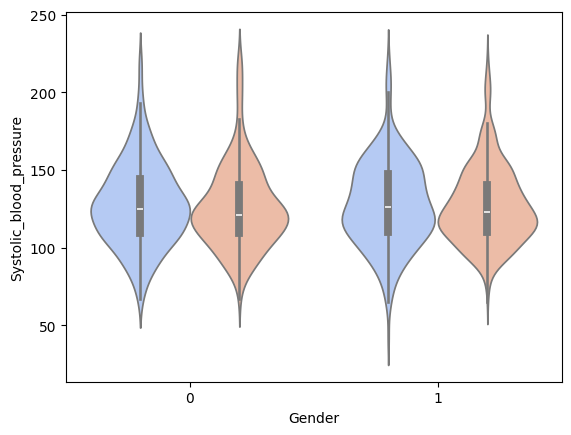

In [208]:
# Plotting a violin plot to visualize the distribution
sns.violinplot(data=df_cleaned, x='Gender', y='Systolic_blood_pressure', palette="coolwarm", hue='Result', legend=False);

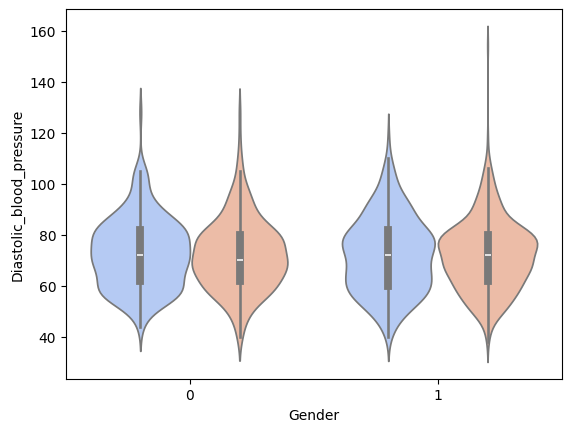

In [209]:
# Plotting a violin plot to visualize the distribution
sns.violinplot(data=df_cleaned, x='Gender', y='Diastolic_blood_pressure', palette="coolwarm", hue='Result', legend=False);

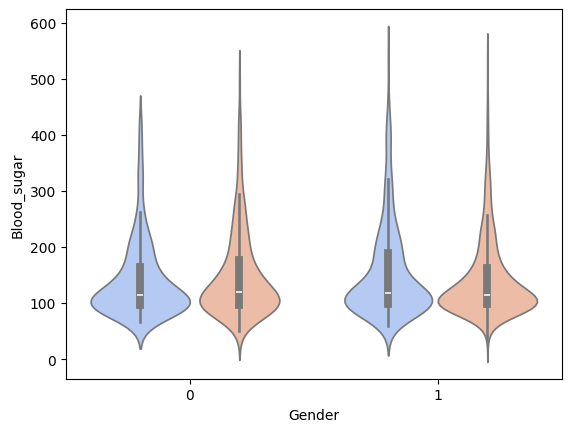

In [210]:
# Plotting a violin plot to visualize the distribution
sns.violinplot(data=df_cleaned, x='Gender', y='Blood_sugar', palette="coolwarm", hue='Result', legend=False);

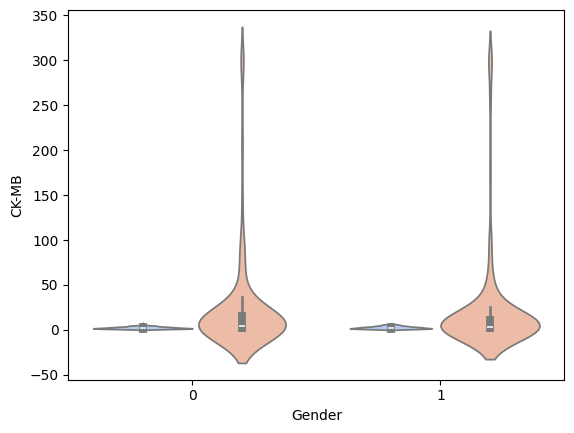

In [211]:
# Plotting a violin plot to visualize the distribution
sns.violinplot(data=df_cleaned, x='Gender', y='CK-MB', palette="coolwarm", hue='Result', legend=False);

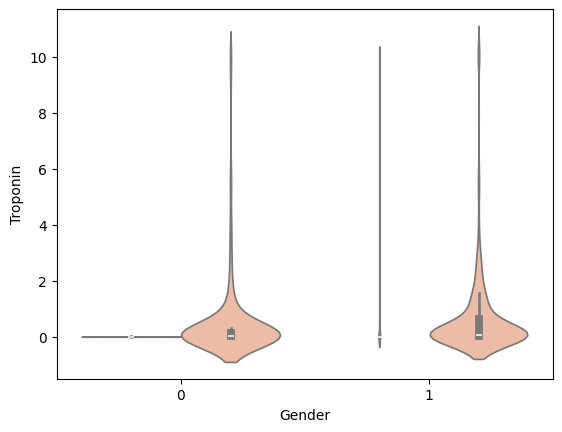

In [212]:
# Plotting a violin plot to visualize the distribution
sns.violinplot(data=df_cleaned, x='Gender', y='Troponin', palette="coolwarm", hue='Result', legend=False);

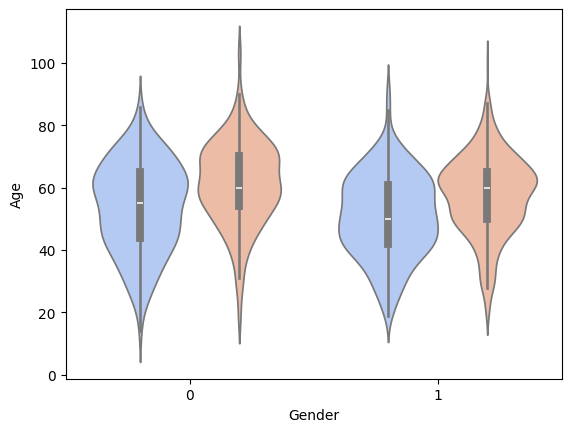

In [213]:
# Plotting a violin plot to visualize the distribution
sns.violinplot(data=df_cleaned, x='Gender', y='Age', palette="coolwarm", hue='Result', legend=False);

### 4.2.3 Numerical / Numercial

**Correlation Matrix**

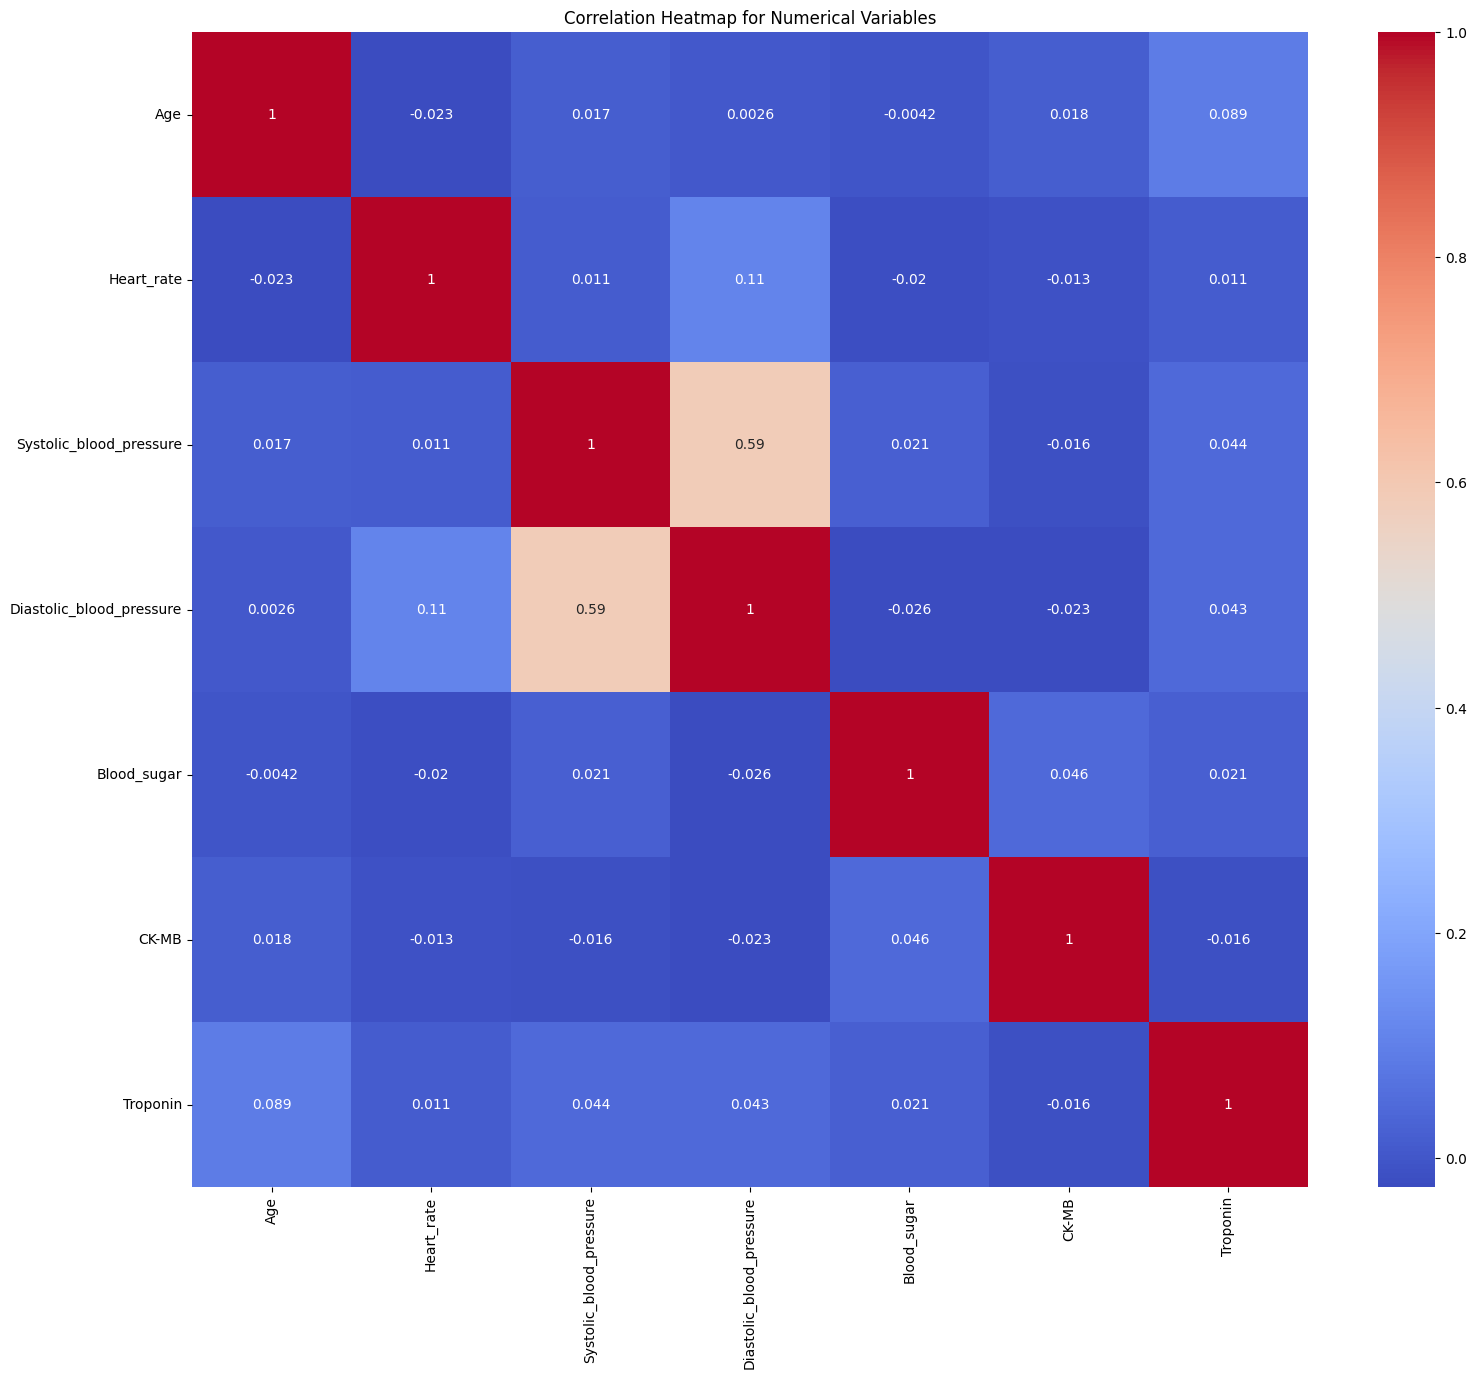

In [214]:
correlation_matrix = df_numerical.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Numerical Variables")
plt.show()

**Scatterplot of Troponin** 

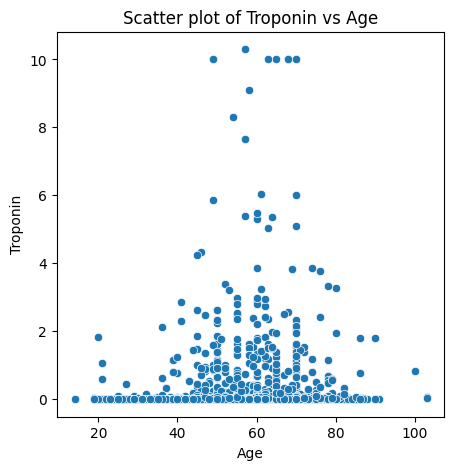

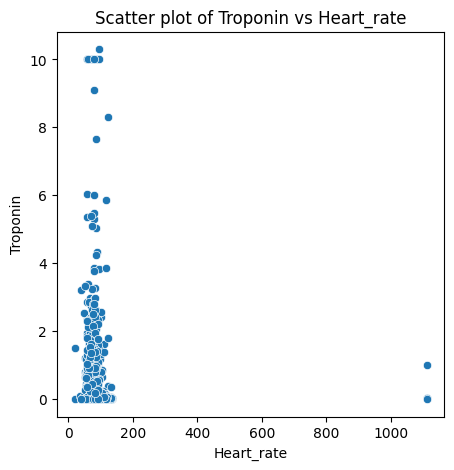

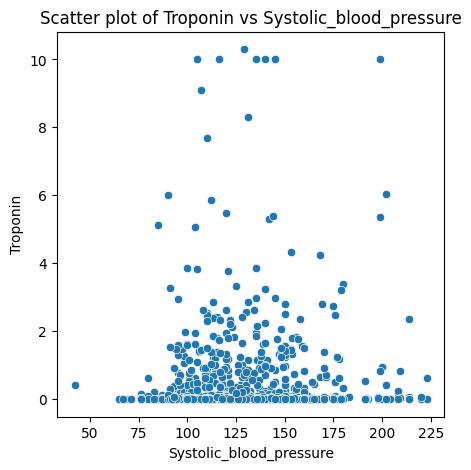

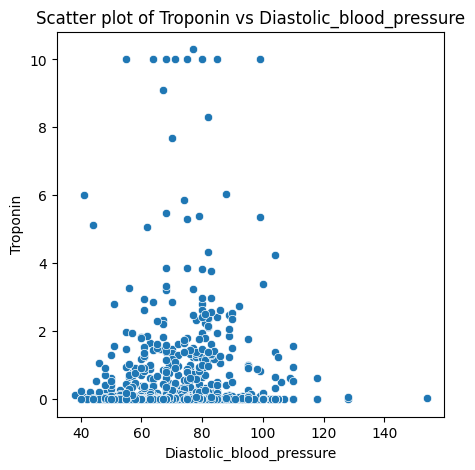

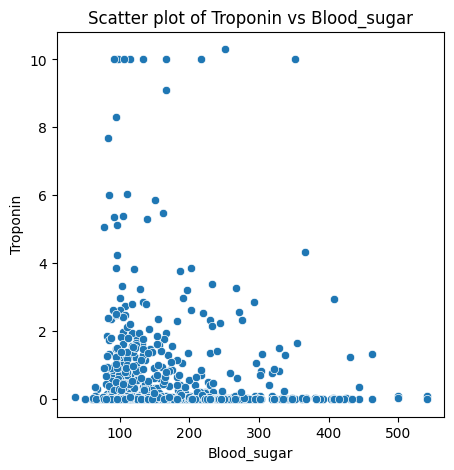

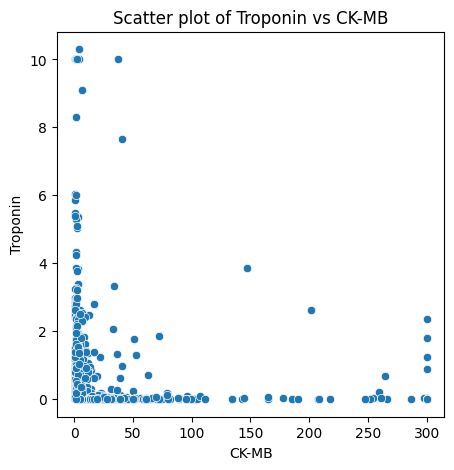

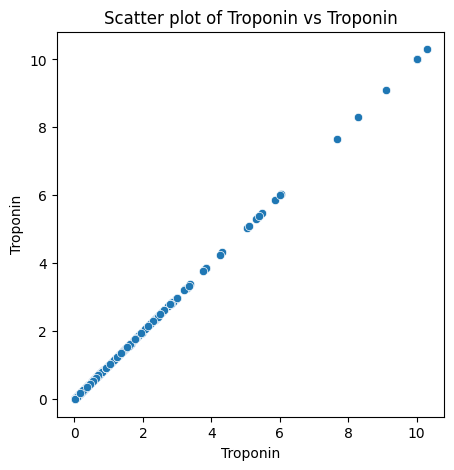

In [215]:
# Plotting scatter plots for each numerical column 
for col in df_numerical.columns:
    plt.figure(figsize=(5, 5))
    plt.title('Scatter plot of Troponin vs ' + col)
    sns.scatterplot(data=df_cleaned, x=col, y='Troponin')
    plt.show()

**Scatterplot of CK-MB** 

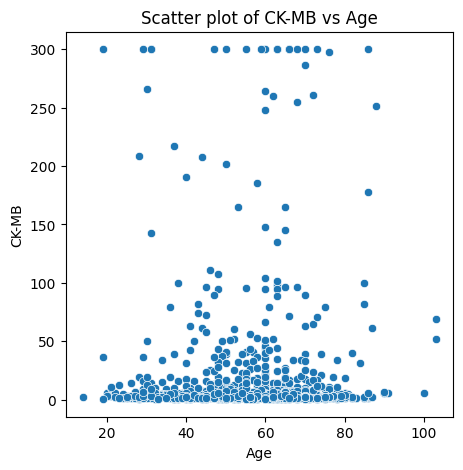

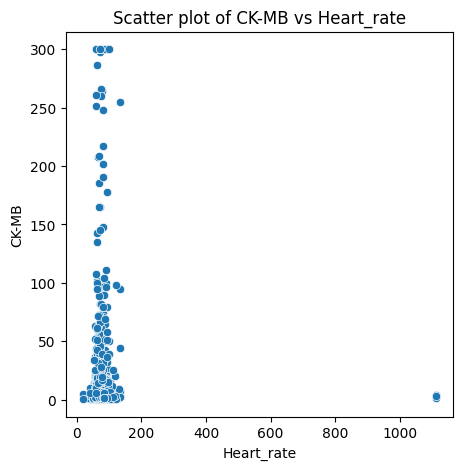

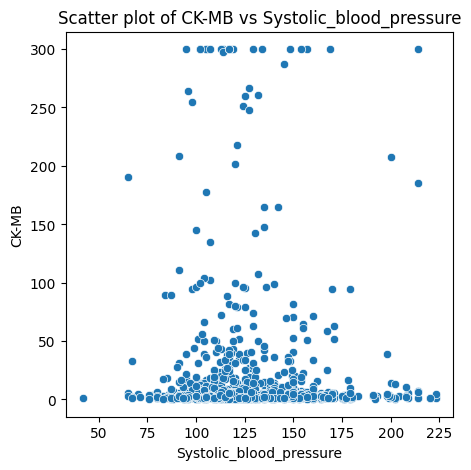

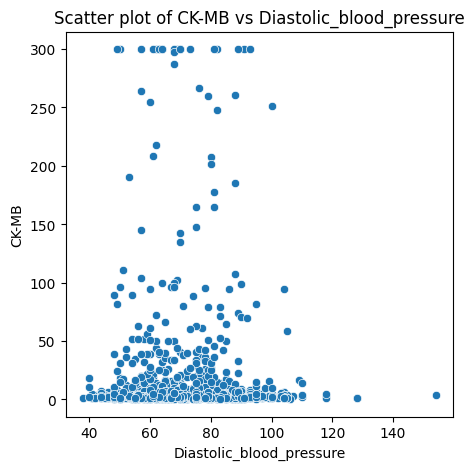

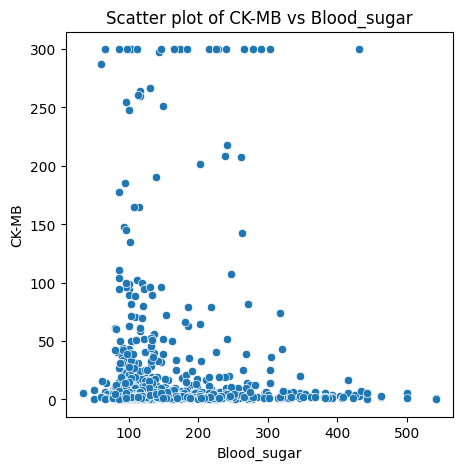

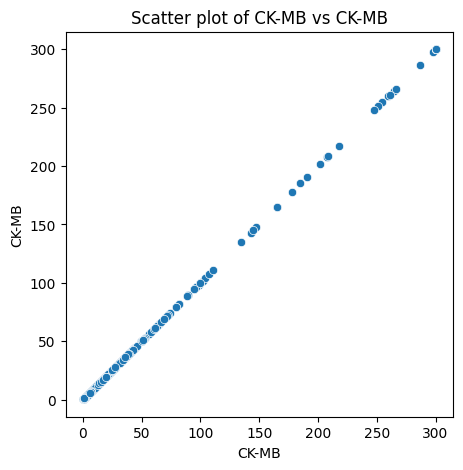

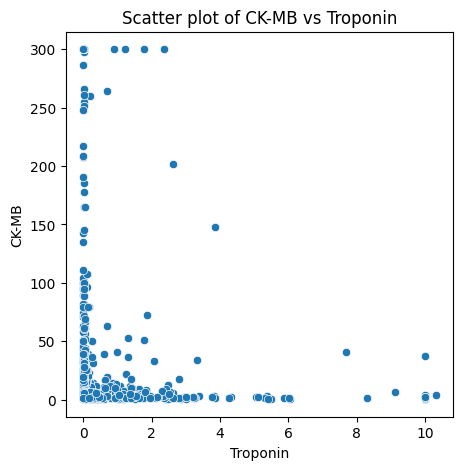

In [216]:
# Plotting scatter plots for each numerical column 
for col in df_numerical.columns:
    plt.figure(figsize=(5, 5))
    plt.title('Scatter plot of CK-MB vs ' + col)
    sns.scatterplot(data=df_cleaned, x=col, y='CK-MB')
    plt.show()

**Scatterplot of Heartrate** 

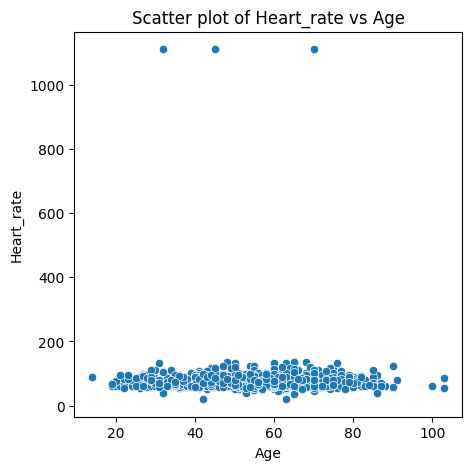

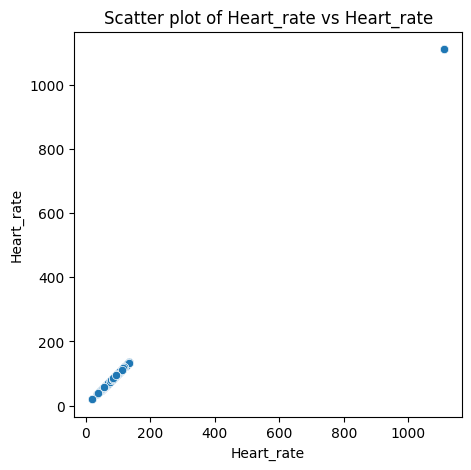

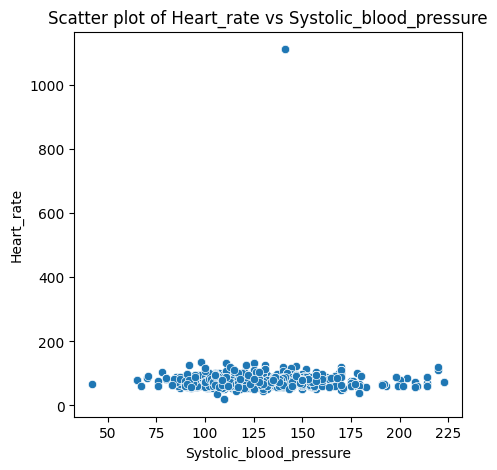

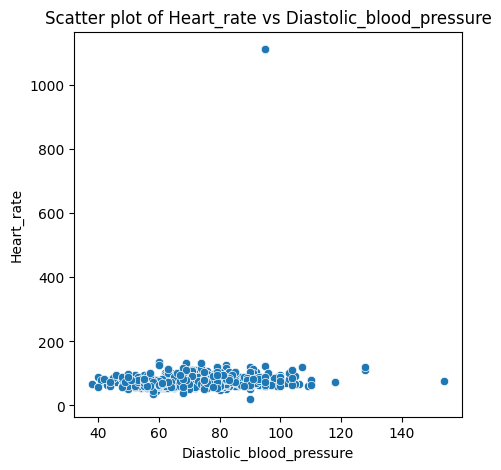

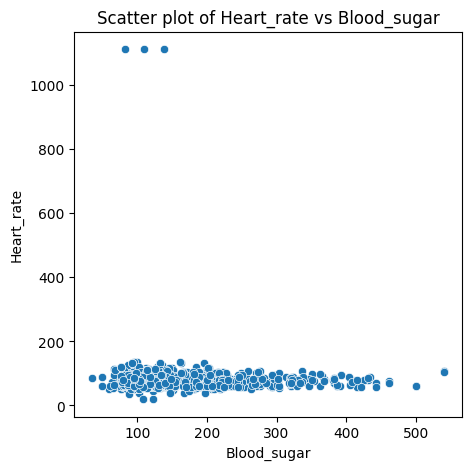

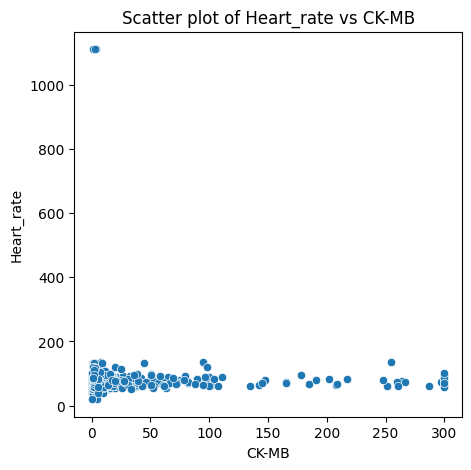

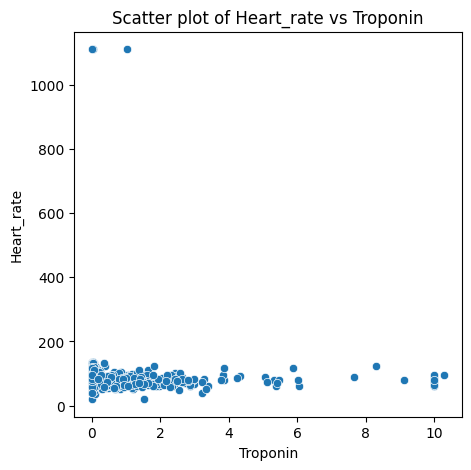

In [217]:
# Plotting scatter plots for each numerical column 
for col in df_numerical.columns:
    plt.figure(figsize=(5, 5))
    plt.title('Scatter plot of Heart_rate vs ' + col)
    sns.scatterplot(data=df_cleaned, x=col, y='Heart_rate')
    plt.show()

**Seaborn Implot for Troponin**

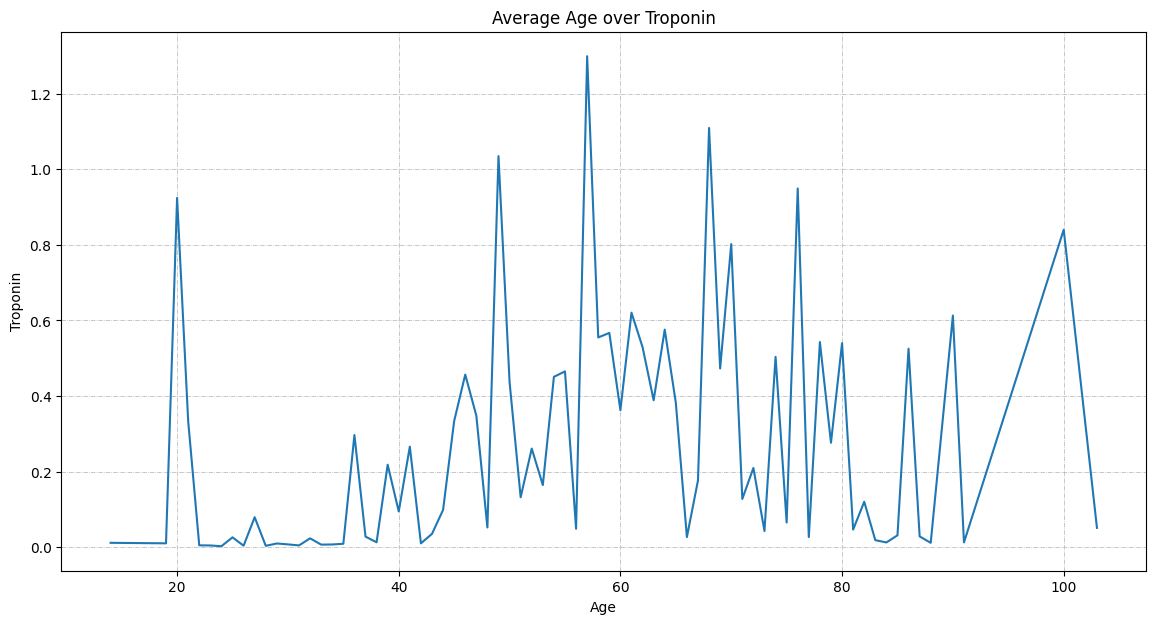

In [218]:
# Plotting a line graph to visualize the trend of average 'SalePrice' across different 'YearBuilt'
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Age', y='Troponin', errorbar=None);
plt.title('Average Age over Troponin')
plt.grid(True, which='both', linestyle='-.', linewidth=0.5)

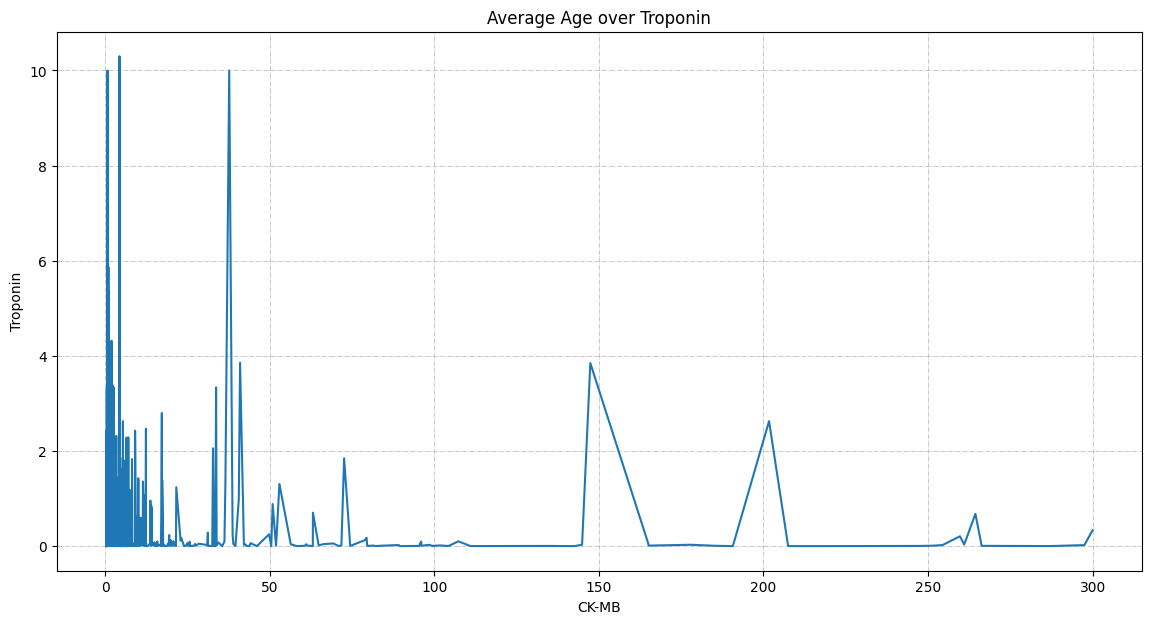

In [219]:
# Plotting a line graph to visualize the trend of average 'SalePrice' across different 'YearBuilt'
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='CK-MB', y='Troponin', errorbar=None);
plt.title('Average Age over Troponin')
plt.grid(True, which='both', linestyle='-.', linewidth=0.5)

**Pearson Correlation coefficients for Troponin**

In statistics, the Pearson correlation coefficient (PCC)[a] is a correlation coefficient that measures linear correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations

In [232]:
# Calculating the Pearson correlation coefficients between 'SalePrice' and all other numerical variables
pearson_correlations = df_numerical.corrwith(df['Troponin'], method='pearson')

# Sorting the correlations for better visualization
pearson_correlations_sorted = pearson_correlations.sort_values(ascending=False)

# Displaying the correlations
display(pearson_correlations_sorted)


Troponin                    1.000000
Age                         0.088800
Systolic_blood_pressure     0.043729
Diastolic_blood_pressure    0.043360
Blood_sugar                 0.021071
Heart_rate                  0.011180
CK-MB                      -0.016009
dtype: float64

**Spearman Correlation coefficients for Troponin**

The spearman correlation coefficient is a statistical measure of the strength of a linear relationship between paired data.

In [233]:
# Calculating the Spearman correlation coefficients between 'SalePrice' and all other numerical variables
spearman_correlations = df_numerical.corrwith(df['Troponin'], method='spearman')

# Sorting the correlations for better visualization
spearman_correlations_sorted = spearman_correlations.sort_values(ascending=False)

# Displaying the correlations
display(spearman_correlations_sorted)

Troponin                    1.000000
Age                         0.364720
Diastolic_blood_pressure    0.037223
Systolic_blood_pressure     0.010039
Heart_rate                  0.009329
Blood_sugar                 0.006785
CK-MB                      -0.048504
dtype: float64

## 4.3 Multivariate Analysis

**Paiplots for Result**

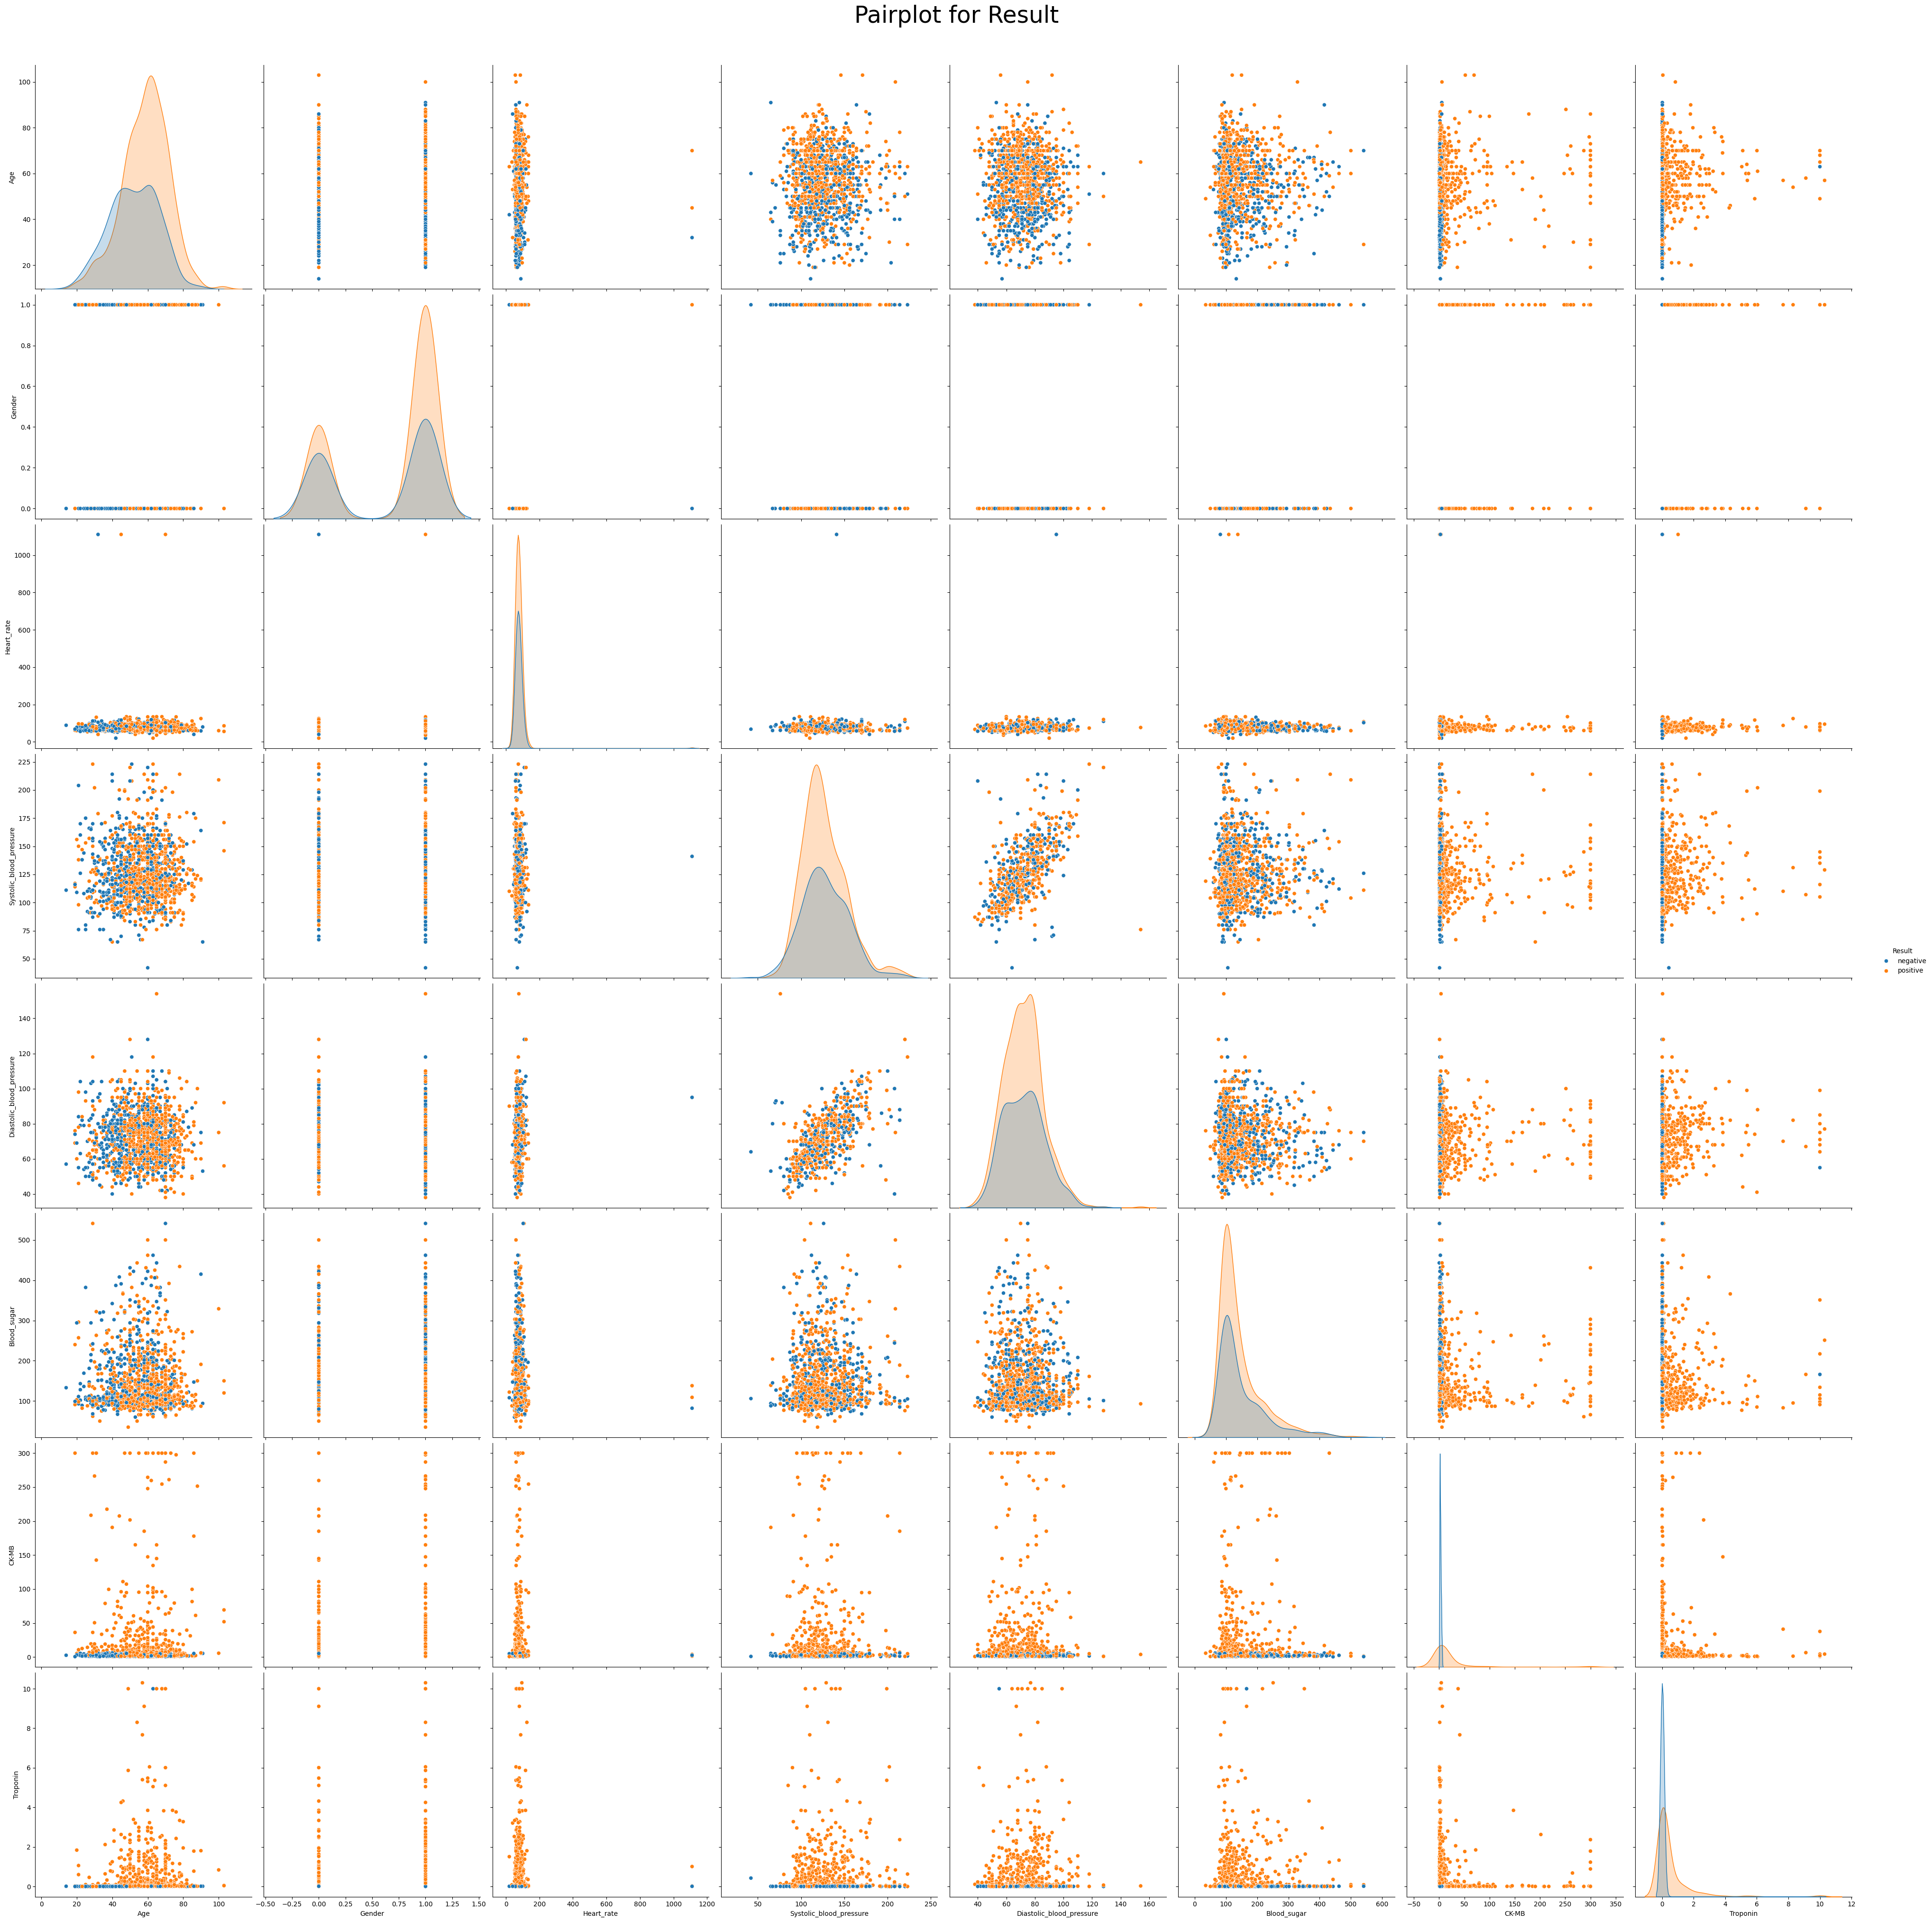

In [221]:
# Create the pairplot
pairplot = sns.pairplot(df_cleaned, hue='Result', height=5)

# Add a title using Matplotlib
plt.suptitle('Pairplot for Result', y=1.02, fontsize=35)

# Show the plot
plt.show()

**Pairplot for Gender**

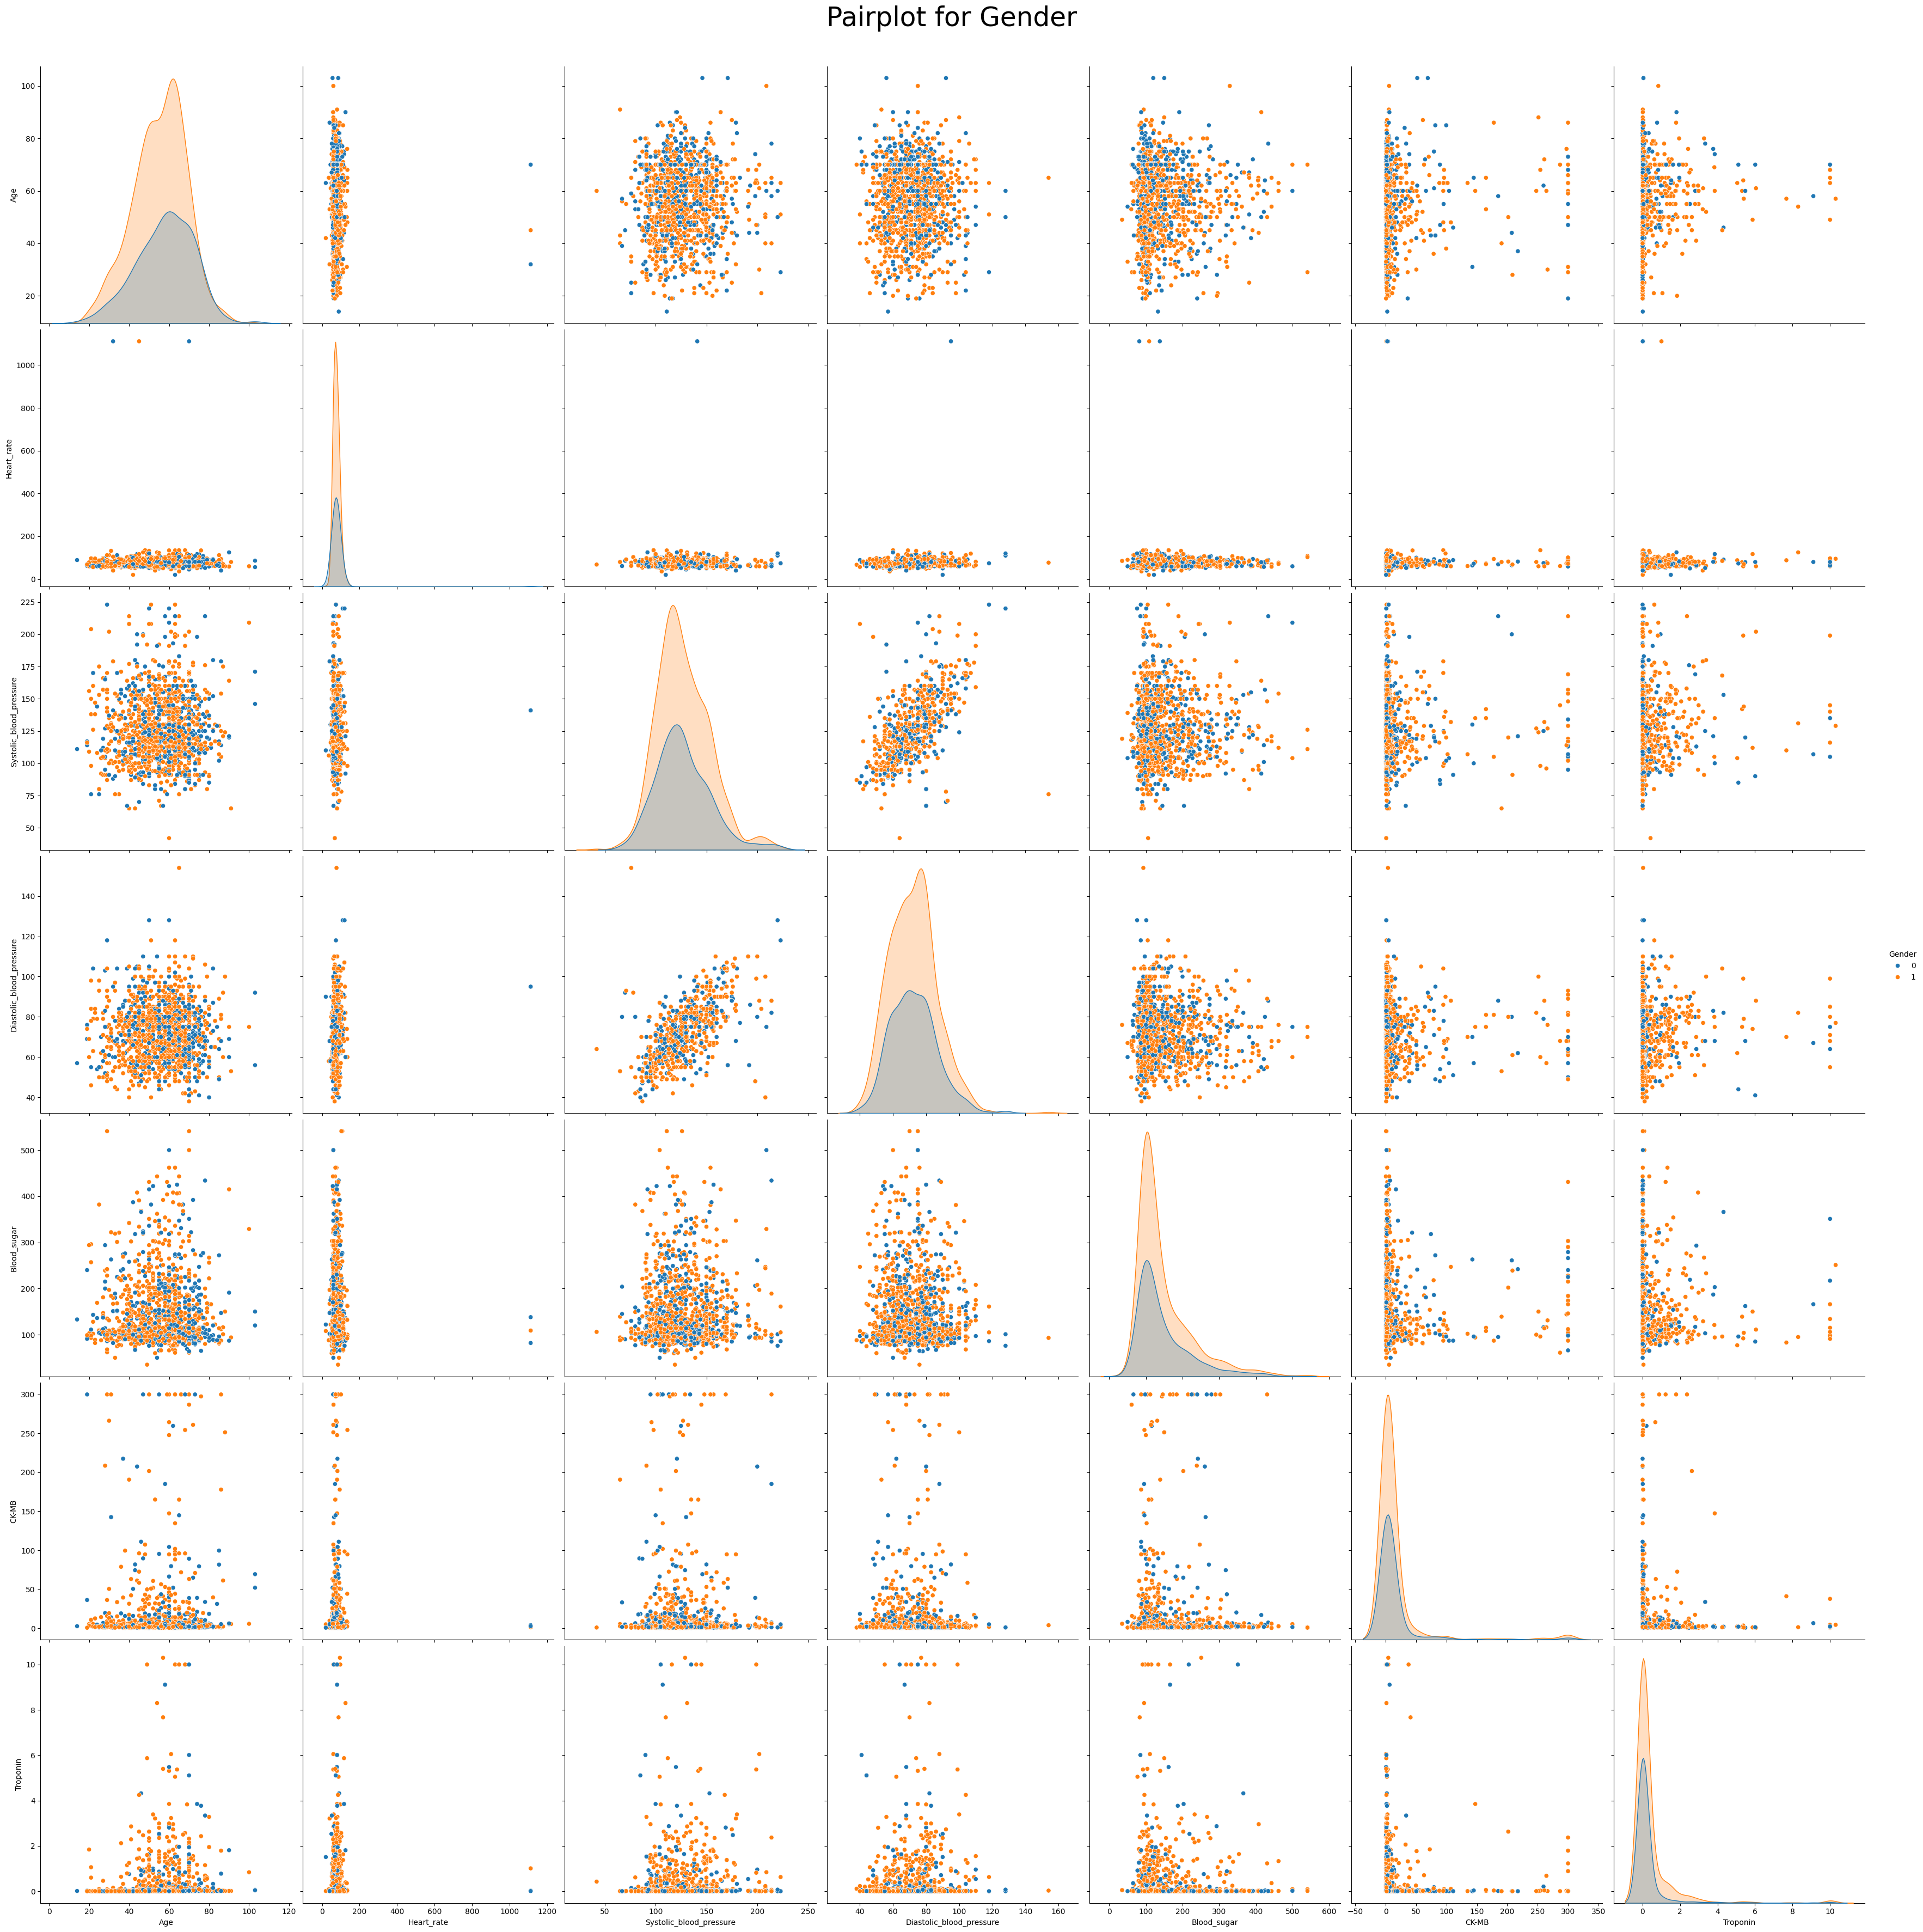

In [222]:
# Create the pairplot
pairplot = sns.pairplot(df_cleaned, hue='Gender', height=5)

# Add a title using Matplotlib
plt.suptitle('Pairplot for Gender', y=1.02, fontsize=35)

# Show the plot
plt.show()

**Pairplot of CK-MB and Troponin in respect to Result**

In [ ]:
sns.pairplot(df_cleaned[["Troponin", "CK-MB","Result"]], hue='Result')
# Add a title using Matplotlib
plt.suptitle('Pairplot for Troponin and CK-MB', y=1.02, fontsize=15)

# Show the plot
plt.show()

# 5 Machine Learning

## 5.1 Feature Engineering